# Mod 5 Project - Bank Marketing Classifier

Student details:
* Student name: **Ryan Beck** 
* Student pace: **part time** 
* Scheduled project review date/time: 
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:

## Project Overview: 

This project is designed to explore machine learning models and methods for the task of classification. We've been tasked with finding a dataset with labeled data with at least 40,000 rows of data and 20 columns. We will generally follow the **OSEMN** process for a data science project, which includes:
* **O**btaining the data
* **S**crubing (or cleaning) the data
* **E**xploring and visualizing the data
* **M**odeling 
* I**N**terpreting the results

**Project goal**: The data we will be using (more below) is a bank marketing data set. The goal for our project is to develop as model that predicts the success of a bank marketing campaign based on the features we have in out data. This model should therefore help us be better able to identify potential customers and refine our the focus of future campaigns. 

# Import Libraries and Data

## Libraries

In [84]:
# Import the necessary functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

from itertools import combinations

from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

## Dataset - Bank Marketing Data Set

### Abstract: 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. **The classification goal** is to predict if the client will subscribe a term deposit (variable y).

### Citation:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt
                
Link to data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Input variables:

_**Bank client data:**_
1. **age**: (numeric)
2. **job**: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education**: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **housing**: has housing loan? (categorical: 'no','yes','unknown')
7. **loan**: has personal loan? (categorical: 'no','yes','unknown')

_**Related with the last contact of the current campaign:**_
8. **contact**: contact communication type (categorical: 'cellular','telephone')
9. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and **should be discarded** if the intention is to have a realistic predictive model.

_**Other attributes:**_
12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

_**Social and economic context attributes:**_
16. **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx**: consumer price index - monthly indicator (numeric)
18. **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
19. **euribor3m**: euribor 3 month rate - daily indicator (numeric)
20. **nr.employed**: number of employees - quarterly indicator (numeric)

_**Output variable (desired target):**_
21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')

### Variable Notes: 

* There are a lot of categorical variables in this data:
    * we will need to deal with those by creating dummy variables for them
    * this will increase the dimensionality of our models significantly, so we will need to explore methods to reduce that where possible
* There are many "unknown" and other placeholder values. We will deal with those on a variable by variable basis
* **duration** is potentially disruptive for our model for the reasons stated in the notes about it we can go ahead and drop that now

### Importing data: 

Let's import our data for the first time and start get and idea of how it looks

In [2]:
# import data and specifiy the separator as ';', show the first 5 rows
df = pd.read_csv('bank-additional-full.csv', sep=';')
# show all the columns in the dataset 
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# check the shape of the data 
df.shape

(41188, 21)

In [4]:
# check the data types and number of entries for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Initial Data Notes: 
* There are over 41k data entries and 21 variables, including the target variable 'y'
* It appears that there are no missing values, but we already know there are **many placeholder values**

Let's take a look at the descriptive statistics for our continuous variables

In [5]:
# show the central tendencies for each continuous variable
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Notes:** 
* 'duration' has a lot of variance, but we already know we'll be dropping that variable
* the mean and median of 'campaign' are very close, but the max value is much greater
* the placeholder '999' has significant influence over 'pdays'
* most other variables appear fairly stable and normally distributed. We'll confirm in our exploratory data analysis

# Clean and Prepare Data

In this section we will: 
1. Check for and deal with missing values
2. Inspect and learn more about the values in each variable
3. Inspect placeholder values and determine whether we want to:
    * impute values
    * drop entries or variables
    * leave them alone

## Missing Values

Although our previous inspection of the data appeared to have no values missing it is still a good step to confirm 

In [6]:
# check for any na values in the dataset
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Looks like we're good to go. Let's move forward with inspecting each variable more closely

## Value Counts

To better appreciate and more easily analyze our different variables we can first separate them into categorical and continuous groups

In [7]:
# create a list of continous and categortical variables based on data type
cont_vars = []
cat_vars = []

for col in df.columns: 
    if df[col].dtype == 'O':
        cat_vars.append(col)
    else: 
        cont_vars.append(col)

print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
print('----' * 8)
print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

There are 11 categorical variables: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
--------------------------------
There are 10 continuous variables: 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [8]:
# check the number of unique values and the percent each value represents
# for each categoritcal variable
for v in cat_vars:
    print(f'Unique values for {v}: {df[v].nunique()}\n', 
          round(df[v].value_counts(normalize=True)* 100, 2), '\n')

Unique values for job: 12
 admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: job, dtype: float64 

Unique values for marital: 4
 married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: marital, dtype: float64 

Unique values for education: 8
 university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education, dtype: float64 

Unique values for default: 3
 no         79.12
unknown    20.87
yes         0.01
Name: default, dtype: float64 

Unique values for housing: 3
 yes        52.38
no         45.21
unknown     2.40
Name: housing, dtype: float64 

Unique valu

### Variable Value Notes: 
* **job:** There are 12 unique values for job with good distribution among them
    * Less than 1% of values are "unknown" -
    * With such a small number of unknowns and a relatively large number of unique values this does not seem like it will have a major influence on our model so for now we **can leave it alone** and revisit if it appears so later
* **marital:** There are three unique values for this variable with a distribution that seems representative of society
    * There are less than .2% of values shown as "unknown", but differently than before with only 3 unique variables for this data we can likely safely **impute values** by applying the known distribution to the unknown values
    * This will eliminate one unnecessary variable later on when we code dummies
* **education:** Education has 8 unique values with 4.2% unknown
    * With just under 1 in 20 values unknown we should consider **imputing values** for this variable similar to the 'marital' variable
* **default:** This is a binary yes/no variable, but also includes just over 20% "unknown"
    * This would be a large value to impute or drop.
    * With a very small value for "yes" we could likely safely code all "unknowns" as "no"
    * But, this is also interesting considering the business problem - it would be interesting to know if lack of knowledge of a default actually positively or negatively contributes to a successful marketing call
    * We will **leave "unknown" in place** for now
* **housing:** This is also a binary yes/no variable, but with a much smaller, 2.4%, amount of unknowns
    * For this variable we can likely safely **impute** again by applying the known distribution of yes/no
* **loan:** Another binary yes/no variable with the same % of unknowns
    * We can treat it similarly as the housing variable and **impute values**
    * With the same amount of unknowns it would be interesting to see if they are the same entries, and if they are missing more data should perhaps be dropped altogether
* **contact:** This variable is interestingly binary as well, between "cellular" and "telephone", we'll have to pay attention to how it is coded when we transform to dummies
* **month:** It appears this campaign was only for 10 months and heavily focused on the spring and early summer
* **day_of_week:** Calls were only made during the work week and seem very evenly distributed
    * Given the even distribution it will be very interesting to see if one day of the week was more fruitful that others
* **poutcome:** It appears that most people that had been contacted were not part of a previous campaign
    * For those that were previously contacted it will be very interesting to see if it has an influence on future success - especially those that were successfully reached previously
* **y:** Our target variable. It is good that we have no missing values here! Also it is good that we have a fairly significant positive rate with 11.27%.

**Continuous variables:** We've already previously seen the descriptive statistics of our continuous variables above and with continue to explore them in our EDA. 
* We do however know that we need to deal with the "999" placeholder for "pdays" and drop "duration"

## Dealing with "duration", "unknown", and "999" 

### Duration: 
As stated in the notes for the dataset, the "duration" variable is not a good predictor of a potential "yes" because a 0 is an automatic "no" and time spent before a call cannot be known. We will therefore first drop this from our data set 

In [8]:
# crete a new dataframe for cleaning and drop the 'duration' column
data = df.drop(columns=['duration'], axis=1)
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### "Unknown"
In the above section we decided we would: 
* Impute values for: 
    1. marital
    2. education
    3. housing
    4. loan
    
We can make a quick function to help impute values based on the weights of the currently known values

In [9]:
# write a function that takes a variable and returns a randomly selected 
# value if the variable is 'unknown'
def impute_values(variable, values, prob):
    if variable == 'unknown':
        return np.random.choice(values, p=prob)
    else: 
        return variable 

#### Marital Unknown

In [10]:
# get a unique list values and drop 'unknown'
values = list(set(df.marital.values))
values.remove('unknown')
values

['divorced', 'married', 'single']

In [11]:
# determine the weight of each value in the category 
prob = data[data['marital'] != 'unknown'].marital.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.6064026466867763, 0.2814050793032986, 0.11219227400992507]

In [12]:
# check the current distribution of values
data.marital.value_counts(normalize=True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

In [13]:
# impute the values for 'unknown'
data.marital = data.marital.map(lambda x: impute_values(x, values, prob))

In [14]:
# check the new distribution of values
data.marital.value_counts(normalize=True)

married     0.605929
single      0.281077
divorced    0.112994
Name: marital, dtype: float64

#### Education Unknown

In [15]:
# get a unique list values and drop 'unknown'
values = list(set(data.education.values))
values.remove('unknown')
values

['basic.9y',
 'basic.4y',
 'professional.course',
 'illiterate',
 'basic.6y',
 'high.school',
 'university.degree']

In [16]:
# determine the weight of each value in the category 
prob = data[data['education'] != 'unknown'].education.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.3083863446283296,
 0.2411485921382771,
 0.15320475454292015,
 0.13287883011886356,
 0.10583673365942672,
 0.05808855209468535,
 0.00045619281749752894]

In [17]:
# check the current distribution of values
data.education.value_counts(normalize=True)

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

In [18]:
# impute the values for 'unknown'
data.education = data.education.map(lambda x: impute_values(x, values, prob))

In [19]:
# check the new distribution of values
data.education.value_counts(normalize=True)

university.degree      0.295426
high.school            0.233296
basic.9y               0.159998
professional.course    0.133316
basic.4y               0.111756
basic.6y               0.060357
illiterate             0.005851
Name: education, dtype: float64

#### Housing Unknown

In [20]:
# get a unique list values and drop 'unknown'
values = list(set(data.housing.values))
values.remove('unknown')
values

['yes', 'no']

In [21]:
# determine the weight of each value in the category 
prob = data[data['housing'] != 'unknown'].housing.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.5367431215483357, 0.46325687845166424]

In [22]:
# check the current distribution of values
data.housing.value_counts(normalize=True)

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

In [23]:
# impute the values for 'unknown'
data.housing = data.housing.map(lambda x: impute_values(x, values, prob))

In [24]:
# check the new distribution of values
data.housing.value_counts(normalize=True)

yes    0.53688
no     0.46312
Name: housing, dtype: float64

#### Loan Unknown

In [25]:
# get a unique list values and drop 'unknown'
values = list(set(data.loan.values))
values.remove('unknown')
values

['yes', 'no']

In [26]:
# determine the weight of each value in the category 
prob = data[data['loan'] != 'unknown'].loan.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.8445693815612717, 0.1554306184387283]

In [27]:
# check the current distribution of values
data.loan.value_counts(normalize=True)

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

In [28]:
# impute the values for 'unknown'
data.loan = data.loan.map(lambda x: impute_values(x, values, prob))

In [29]:
# check the new distribution of values
data.loan.value_counts(normalize=True)

no     0.827571
yes    0.172429
Name: loan, dtype: float64

### "999"

As we know, the placeholder "999" value for 'pdays', which is the number of days since the customer was previously contacted is very prevalent. Let's take a look at how much before we decide what to do with it. 

In [30]:
# check the the number of time '999' occurs relative to other values
data.pdays.value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
19     0.000073
22     0.000073
21     0.000049
26     0.000024
20     0.000024
25     0.000024
27     0.000024
Name: pdays, dtype: float64

**Notes:** 
* The placeholder represents over 96% of values
* 0 is also a value, which may mean that a customer had previously been called on the same day

For now we can create a **new binary variable** that indicates whether or not a customer had been previously contacted. With only 4% of customers having been previously contacted this may not turn out to be a strong predictor. If it turns out that it is an important feature we can revisit. 

In [31]:
# create new column that indidates where or not a customer has been contacted
# since 999 means "not contacted" we can use that as an identifier

data['p_contacted'] = [0 if x == 999 else 1 for x in data.pdays] 
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,p_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


Let's check the value counts of our new variable to see if the distribution remains the same. We should see ~96% 0's

In [32]:
# check value counts for p_contacted
data.p_contacted.value_counts(normalize=True)

0    0.963217
1    0.036783
Name: p_contacted, dtype: float64

This looks right! Now we can drop the original 'pdays' column for now.

In [33]:
# drop the 'pdays' column
data.drop(columns=['pdays'], inplace=True)
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,p_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


This wraps up our cleaning for now. Now let's see how our data looks before we start transforming it for our models. 

# Exploratory Data Analysis and Feature Transformation

In this section we will take a deeper look at all of our variables to see if we can learn more about them before transforming them for modeling. We will look at:
1. Counts of categorical variables
2. Distributions of continuous variables
3. Potential correlations
4. Class imbalance and transformations

## Categorical Variables

In this section we will primarily look at the counts of our different categorical variables to get a feel for how they are distributed. First, we'll separate them out into their own dataframe to work with.

In [34]:
# create a dataframe with only the categroical variables we observed earlier
cat_data = data[cat_vars]
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


This looks good, except we've create a new categorical variable since we last looked at all our categorical variables, 'p_contacted'. We can add that to this dataframe now. 

Also, we should note that our target variable is in this group. That's ok for now, we want to have an idea of how that looks too. 

In [35]:
# add the 'p_contacted' variable to cat_data
cat_data = cat_data.join(data.p_contacted)
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,p_contacted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,0


### Plot category counts and relationship with 'y'

We'll plot the overall counts of each categorical variable value and look at the rate of "yeses" we got for each to start looking for possible relationships for a successful marketing campaign. 

It will help to first turn our target variable 'y' into a binary dummy so that we can get averages

In [ ]:
# one-hot encode the target variable 'y'
cat_data.y = pd.get_dummies(cat_data.y, drop_first=True)
cat_data.head()

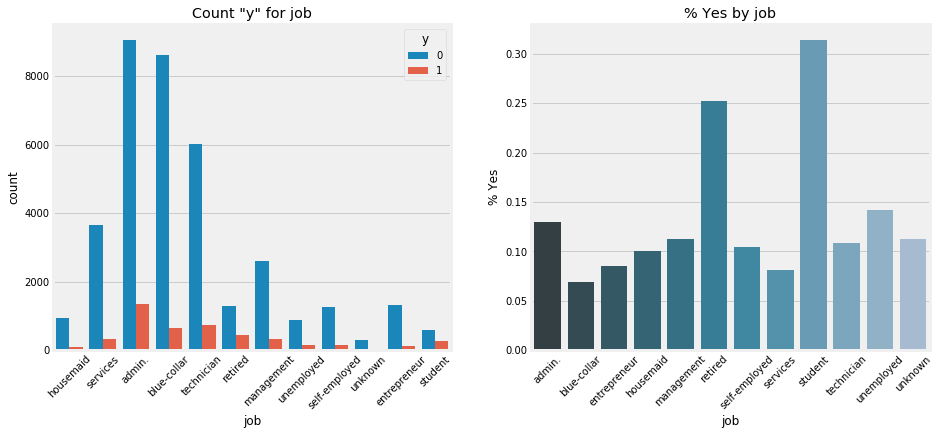

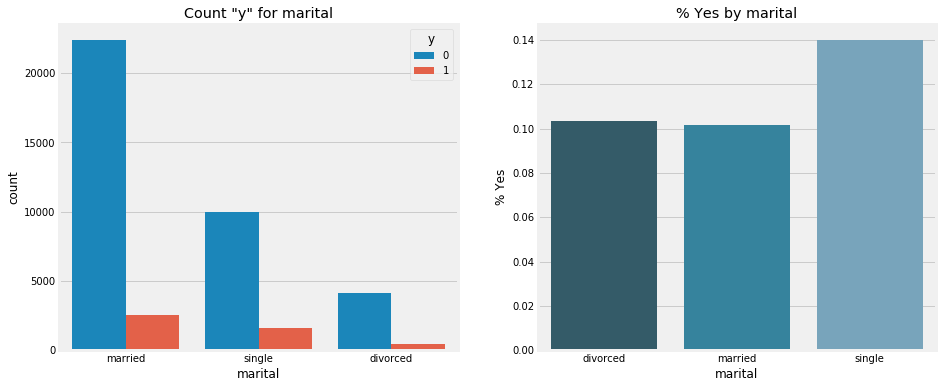

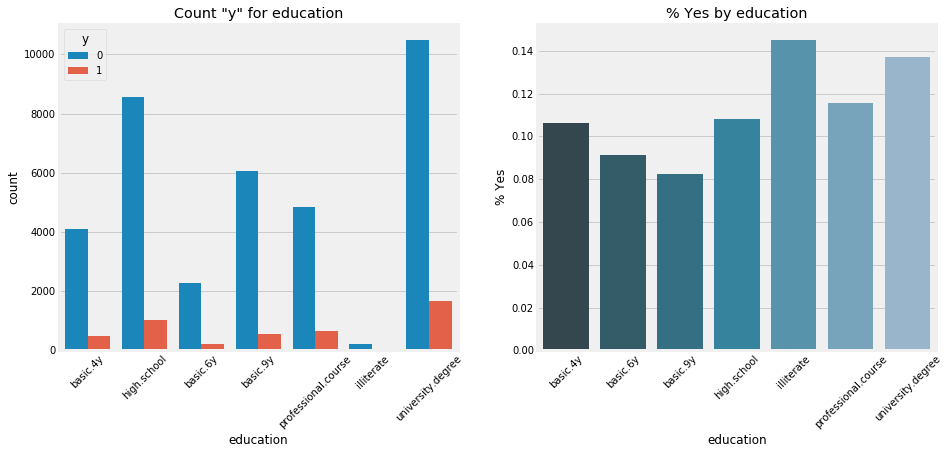

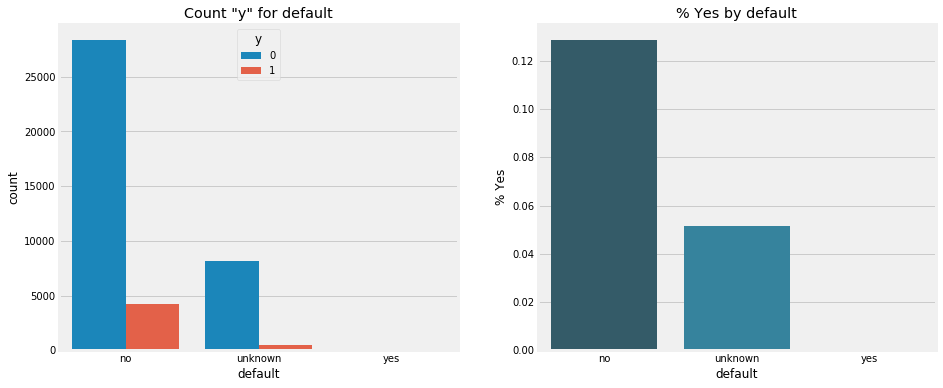

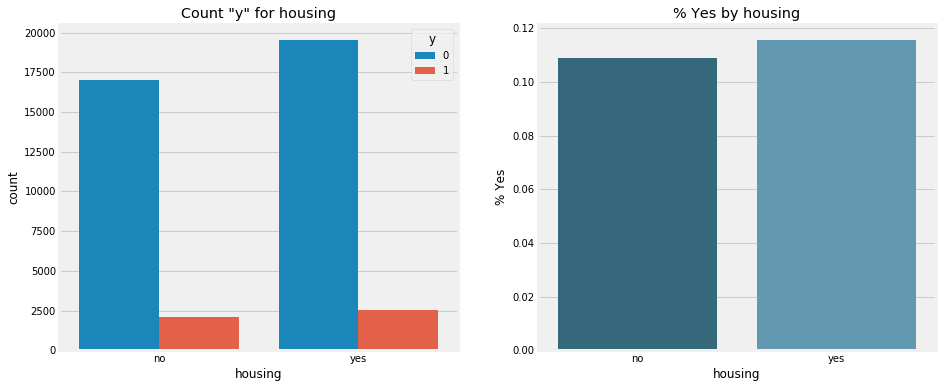

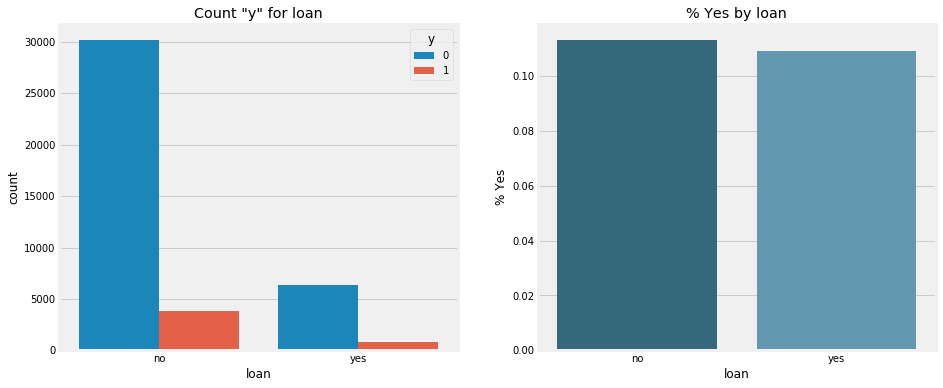

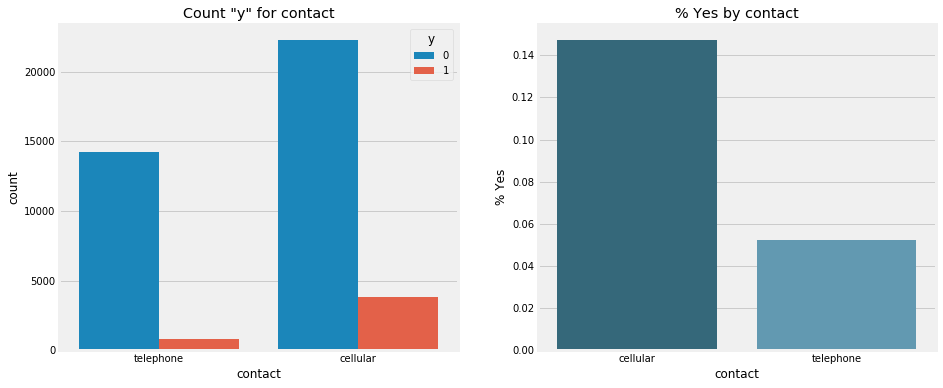

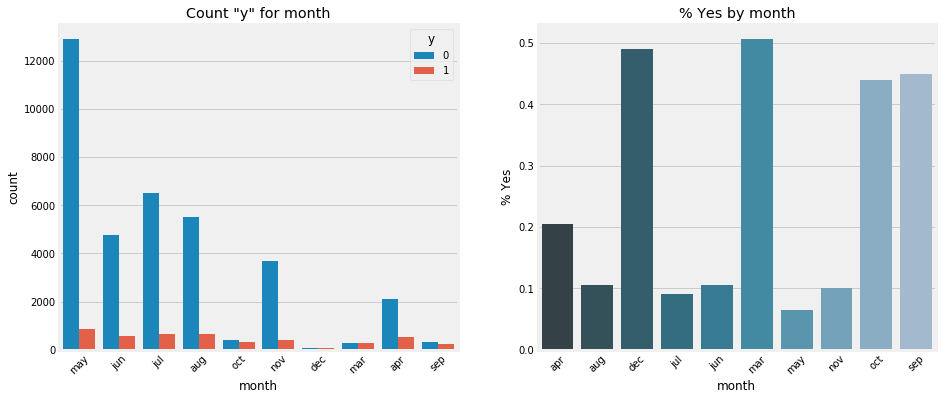

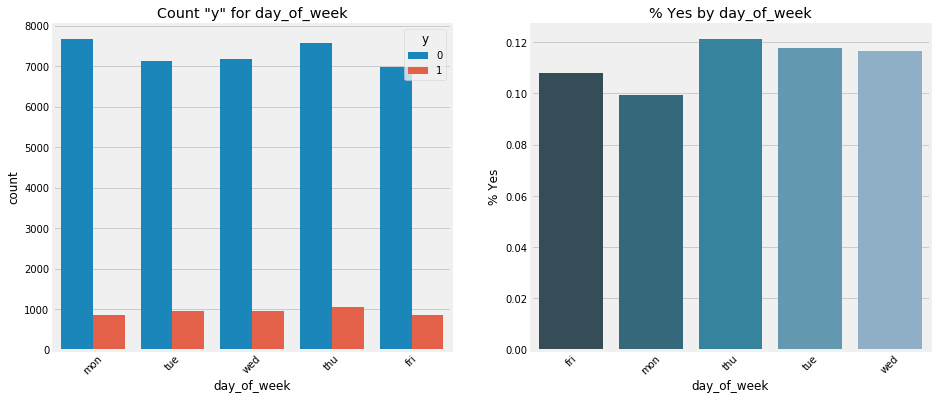

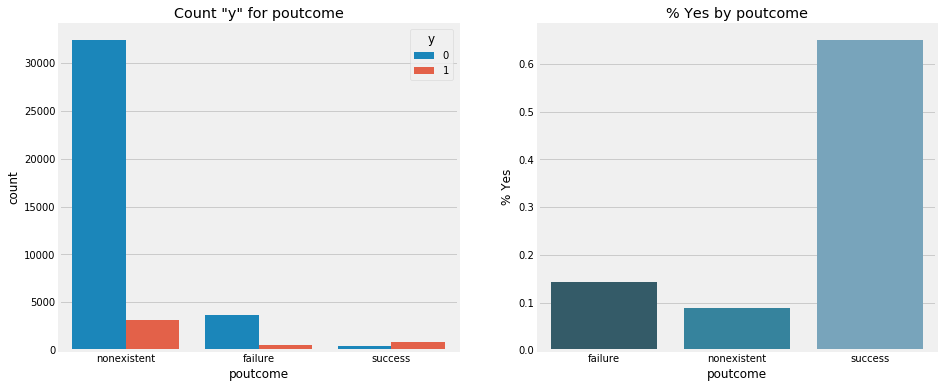

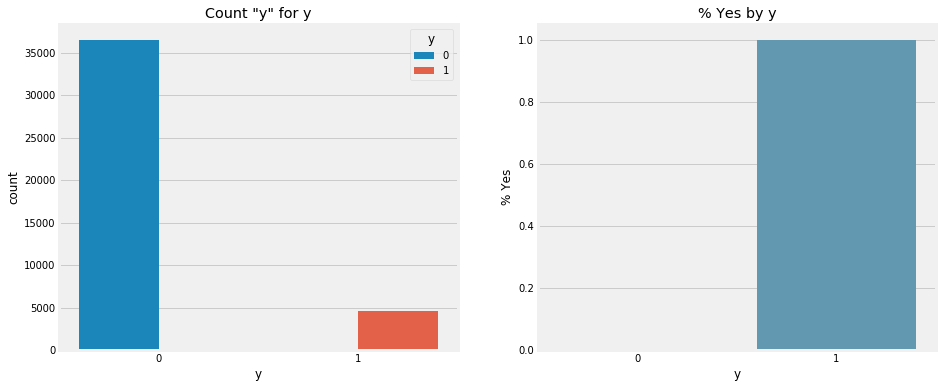

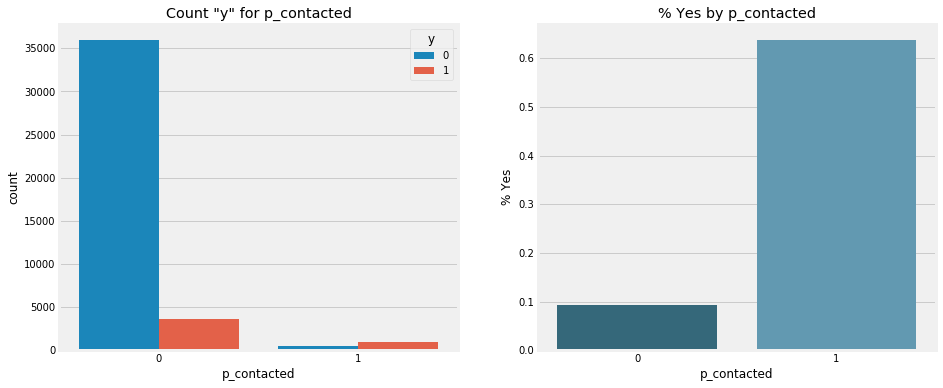

In [83]:
# iterate through the categorical variables and plot the value counts and 
# percentage 'y' for each value
for col in cat_data.columns.values:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_data[col], data=cat_data, hue='y')
    plt.title(f'Count "y" for {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    cat_percent = cat_data.groupby(col)['y'].mean()
    sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')
    plt.ylabel('% Yes')
    plt.title(f'% Yes by {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

    plt.show()

### Categorical variable observations

* **Job:** Overall job does not appear to be much of a predictor of success for the marketing campaign. Although there does appear to be greater success among students, retirees and admin professionals, they represent relatively small numbers within the overall campaign. It could be a sigh that this particular product was well suited to them. 
* **Marital:** Success among married and divorced people appear roughly the same, but there is much **more success** among single people. That may turn out to be a good predictor.
* **Education:** Success seems a little more evenly distributed here. It appears high among the illiterate, but they represent a very number of the total count. University educated individuals seem to respond well, and they are the largest group in the data. This may be a good predictor. 
* **Default:** Those that have not defaulted on a loan are much more likely to successfully become customers than our unknowns, and at a slightly higher average (\~12.5%) than the overall average (\~10%)  
* **Housing:** Whether or not someone has a home loan does not appear to have much of a relationship with the success of the campaign.
* **Loan:** Personal loans also do not appear to be much of a predictor
* **Contact:** Customers contacted via cellular phone appear to be much more likely to be successful prospects, this is interesting. Cellular customers were also contact more, but not with too much imbalance. 
* **Month:** Month does not appear to have a very significant effect. There are months with very high success rates, but those are often months that also have very low relative counts. It would be interesting to know if those are follow-ups in the later months, or return customers or warm leads in the early months. Overall it appears that the majority of the campaign occured between May and August
* **Day of week:** Day of week does not seem to have a large amount of significance, but the middle days do appear to be slightly more successful than Monday and Friday. 
* **Poutcome:** The outcome of the previous marketing campaign does appear to have an effect. Even though it is a very small number, prior success seems to suggest later success. And, those that were contacted and failed also are more successful, indicating that returning to previous targets may have value. 
* **Pcontacted:** Those that had been previously contacted in the campaign ended up signing up at a rate of 60%, that is very high, even though the overall count of these individuals is small. This variable is tough to interpret because intuitively it makes sense that customers that have been contacted before are more likely to have signed up than those called for the first time simply because they have been given more opportunities to say "yes". There are a number of reasons these people may have been called more that once that do not suggest a greater amount of calls necessarily results in greater customer conversion, but it also suggest that customers that are leaning yes may be more likely converted with persistence. 

Variables to keep an eye on are: **Pcontacted, job_student, job_retired, marital_single, contact_cellular**

Variables that may not be as helpful: Month, Day of week, home, loan, education

Perhaps one of the most important observations we can see from above is that our **target variable, y** is **imbalanced**. Only \~11% of the rows observed here result in a positive customer conversion. We will have to take that into account as we are doing our final feature transformations when we begin modeling.  

## Continuous Variables

Now that we've given our categorical variables a good luck, let's dig deeper into our continuous variables and see if we can gain more early insights.

Let's remember that we began with a different list of continuous variables than we have now, so let's check and see what we need to update. 

In [85]:
# check the values we have for continuous variables
cont_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

It looks like we still have 'duration' and 'pdays', which we've either removed or changed into a categorical variable. Let's adjust our list accordingly.

In [86]:
#drop 'duration' and 'pdays' from the list 
cont_vars.remove('duration')
cont_vars.remove('pdays')
cont_vars

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

Ok, now that we've fixed out list we let's create a dataframe to work with.

In [87]:
# create a dataframe of continuous variables using our list
cont_data = data[cont_vars]
cont_data.head(2)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0


Let's create a quick function to help us iterate through plotting the distribution of these variables. 

In [95]:
# create a function that iterates through the dataframe and plots histograms for our continuous variables 
def plot_cont(df):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(df.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(df.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.distplot(a= df[t],   
                     ax=ax)
        plt.title(t + '_distribution')
        

### Plot continuous variables

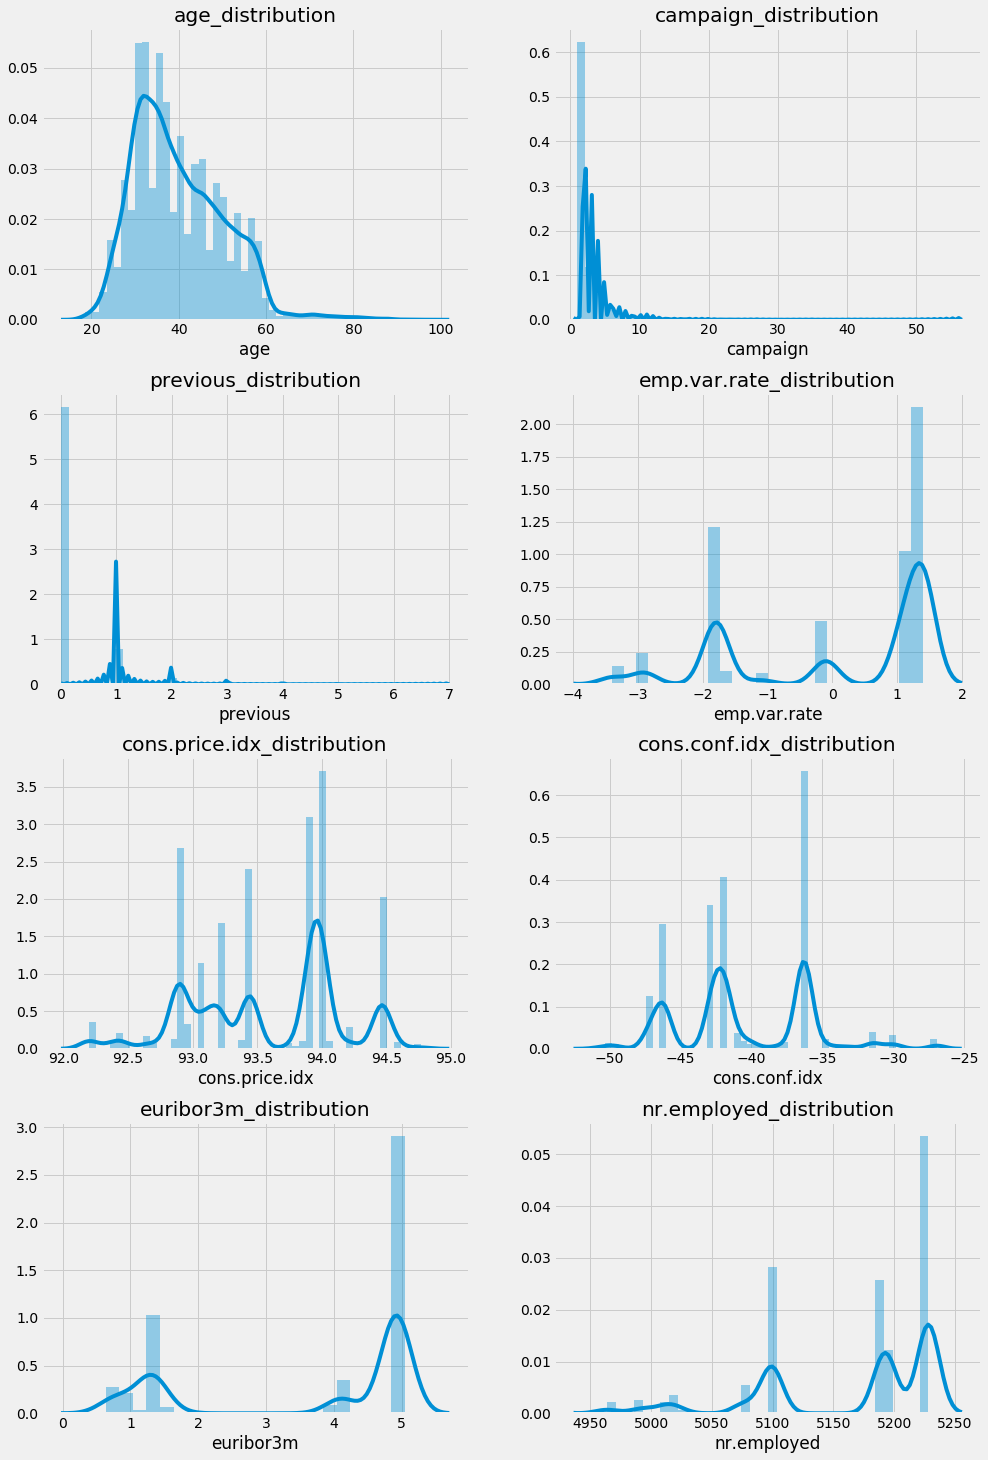

In [96]:
# plot histograms for the continuus variables
plot_cont(cont_data)

### Continuous variable distribution observations

* Most of the data is not normally distributed, with **Age** being the closest variable that is
* The variables that have to do with number of times contacted (**campaign**), or previously contacted (**previous**), are all very skewed to the right due to the fact that most people had not previously been contacted or were not contacted a large number of times
* Other values like **consumer price index** and **consumer confidence index** have similar shapes and which suggests there might be some sort of correlation. Similar for **employee variation rate**, **number employed** and the **euribor 3 month rate**.

We've seen one representation of outliers here, let's see how they look with a box plot

### Continuous box plots

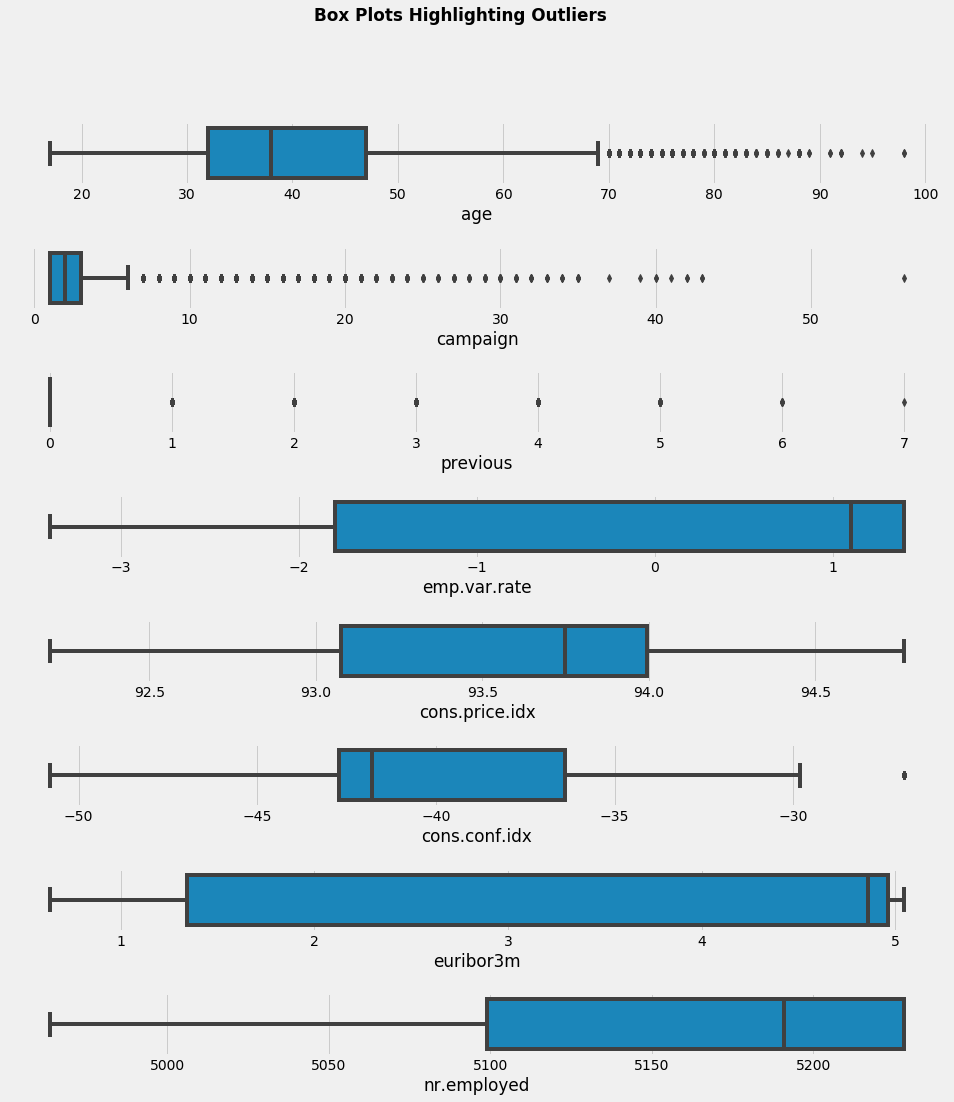

In [105]:
# create a box plot for each continuous variable
nrows = len(cont_vars)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(cont_vars):
    sns.boxplot(cont_data[var], orient='h', ax=axes[i])

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

#### Observations: 
* Similar to observations above, outliers for **age** begin around 70
* **Campaign** and **previous** are tightly clustered around 0 and lower numbers, almost to the point of binning them our creating a categorical similar to what we did with p_contacted
* Our economic variables all seem to have few outliers, which is not surprising given that many of them are indexes and likely designed to stay within a certain range. These may be more reliable predictors

### Checking for correlations and multicollinearity

We want to make sure that there are not too many highly correlated values in our data so we can assume that one variable can change while others remain there same. Let's take a look at our data to see what relationships we can find, as well and also start to take a look to see if any of these variables have a relationship with 'y'.

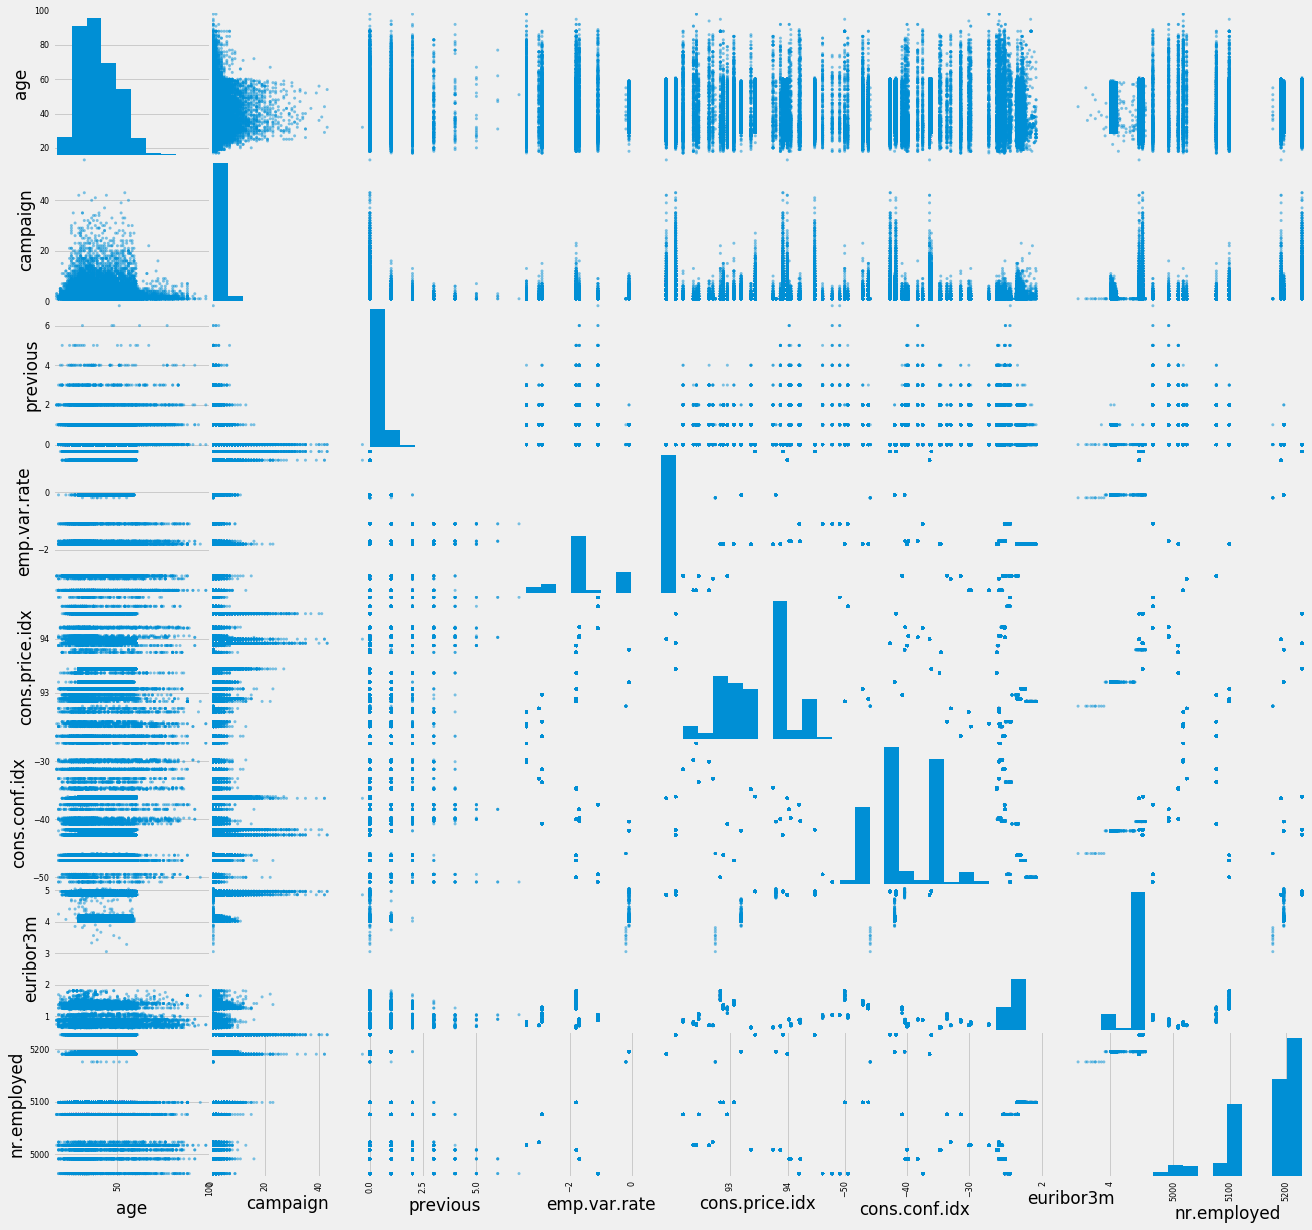

In [112]:
# plot a scatter matrix of all continuous variables and observe realtionships
pd.plotting.scatter_matrix(cont_data, figsize=(20,20));

**Observations:** Among the plots above there do not seem to be any liner relationships, but there there may be some very highly correlated pieces of data based on the plots that show little variation. Remembering that there are over 40,000 points of data in this dataset, any of the plots that have large areas of blank space may suggest a very tight cluster and potential correlation. 

#### Age Scatter Plots 
Age seems to have the largest number of unique values, so to explore more let's make more scatter plots of that variable with others, and see if there is a relationship with 'y'.

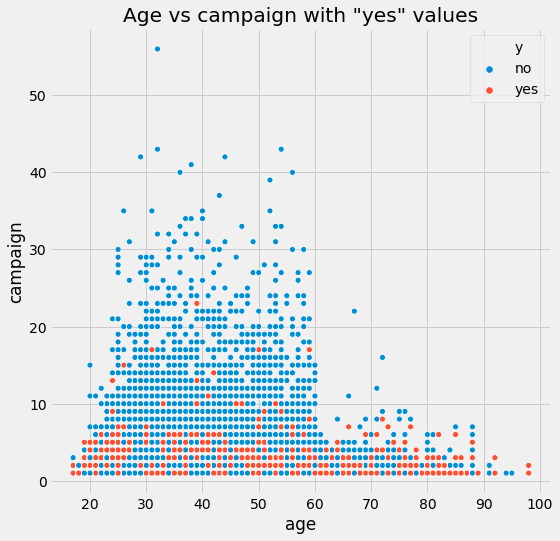

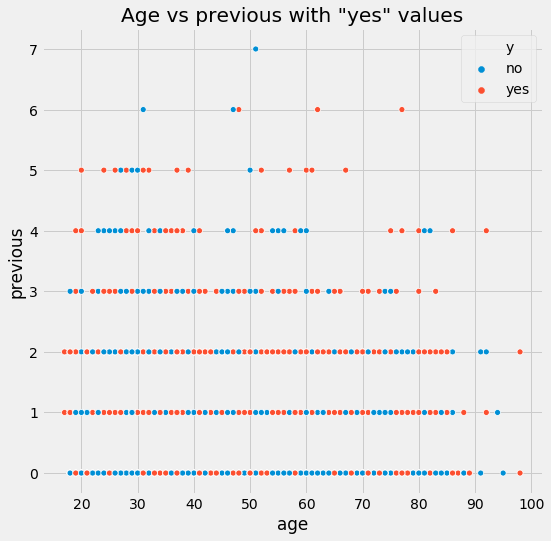

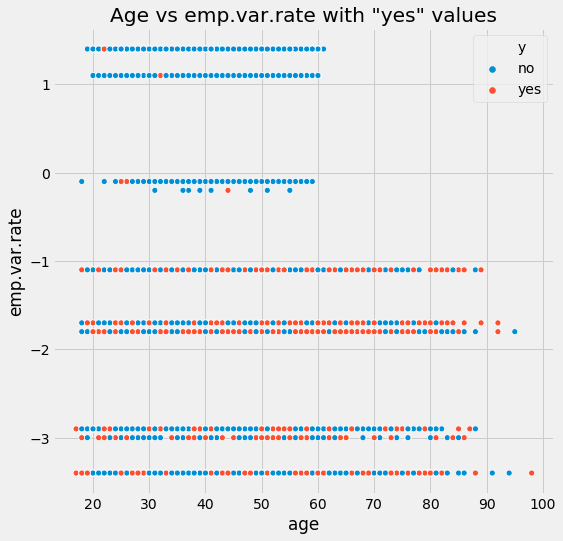

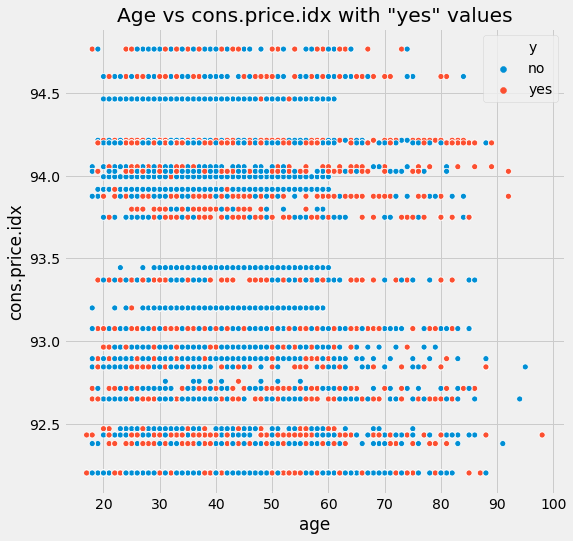

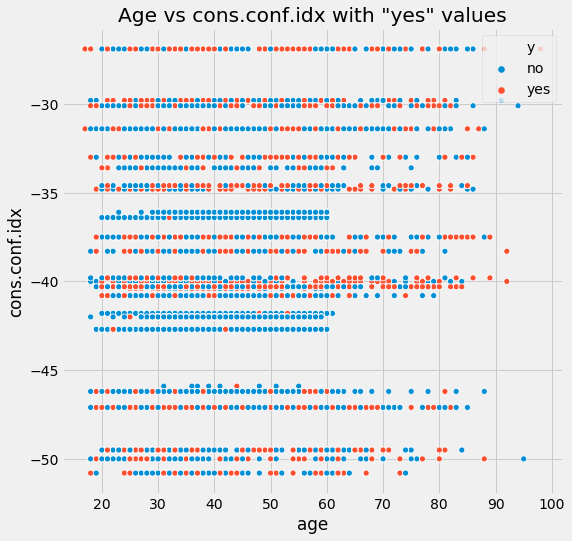

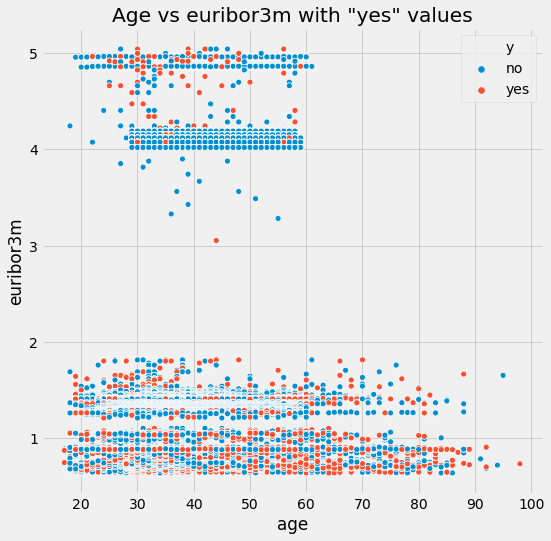

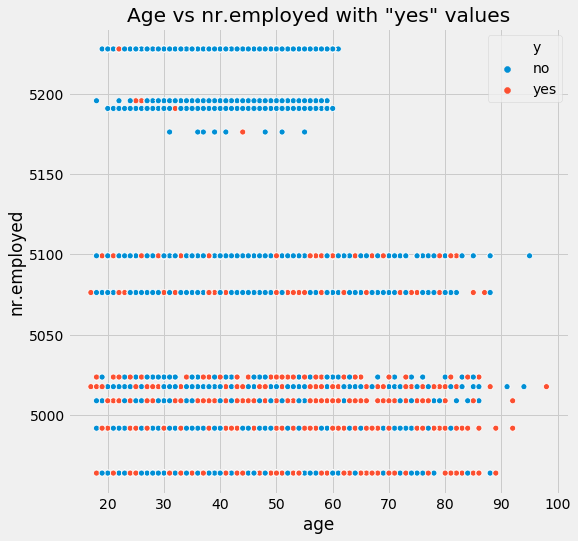

In [119]:
cont_vars = list(cont_data.columns.values)
cont_vars.remove('age')

for v in cont_vars:
    fig = plt.figure(figsize=(8,8))
    sns.scatterplot(x=data.age, y=data[v], hue='y', data=data)
    plt.title(f'Age vs {v} with "yes" values')
    plt.show()

**Observations:** Most of these plots don't appear to suggest a clear relationships with 'y'. There does appear to be some relationship with lower values of **contacted**, middle values of **emp.var.rate** and lower values of **nr.employed**. We will need to scale a lot of this data later, and it may be interesting to see if it is easier to plot some of these relationships then.  

#### Correlation Heatmaps

As mentioned above, we want to check for highly correlated values and consider removing them from our data for modeling. One way we can check if by creating correlation heatmaps and checking for values above **.7 to .8**

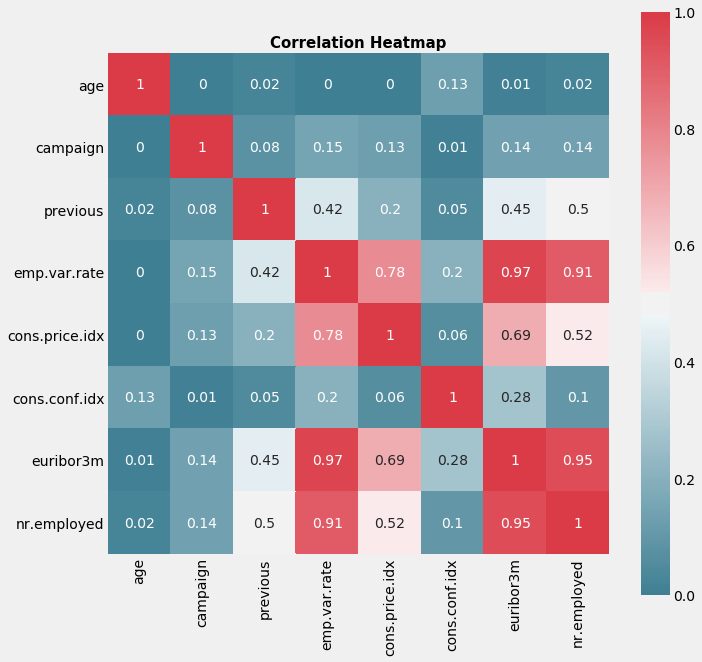

In [121]:
# plot a heatmap of correlations for our categorical values
correlation = abs(round(cont_data.corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

**Observations:** emp.var.rate looks to be the most highly correlated with other values, with three correlations over .7. Let's drop that from the data and see what happens. 

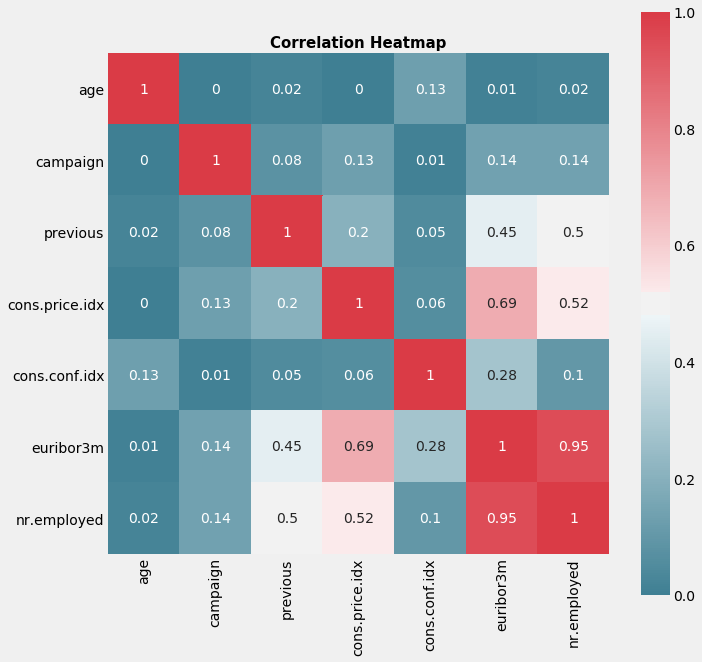

In [122]:
# check correlations without the 'emp.var.rate' variable 
correlation = abs(round(cont_data.drop(columns=['emp.var.rate']).corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

**Observations:** This looks much better. We now only see a very high correlation between nr.employed and euribor3m. However, euribor also has a nearly high correlation with cons.price.idx, so let's dorp that one as well and see where we are then. 

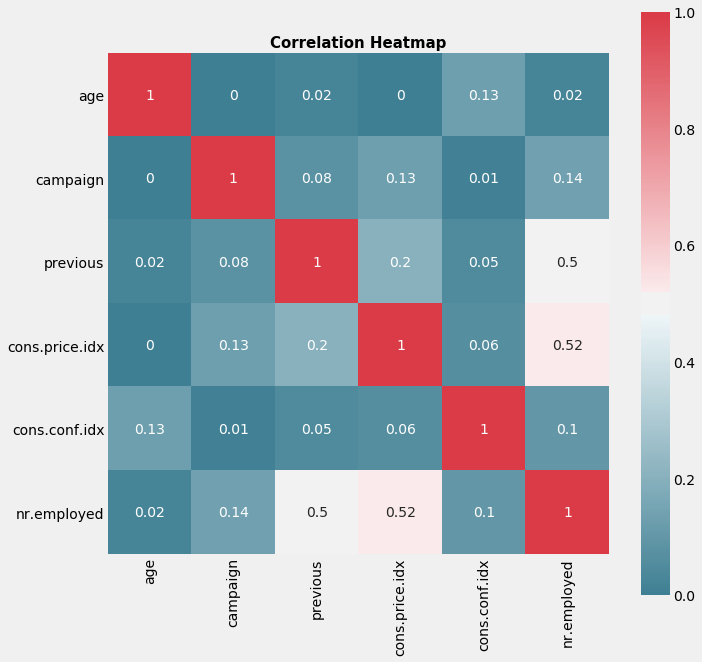

In [123]:
# check correlations without 'euribor3m' and 'emp.var.rate'
correlation = abs(round(cont_data.drop(columns=['euribor3m', 'emp.var.rate']).corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

**Observations:** This looks much better. We're now seeing no high correlations between any of our continuous variables. 

#### Modeling data 
We now know which variables we want to use for our initial modeling. All of our previous categorical variables, plus the remaining continuous variables. 

We still have a lot of **feature transformation** to do, and depending on the performance of our models we may still **add data back** later if it makes sense. But, for now let's drop those variables and move forward with transformations

In [124]:
# create a copy of our data withour the continuous variables we want to drop
model_data = data.drop(columns=['euribor3m', 'emp.var.rate']).copy()
model_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y,p_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,93.994,-36.4,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,93.994,-36.4,5191.0,no,0


In [125]:
model_data.shape

(41188, 18)

## Transformations

In this section we will start transforming our data to be more readable by machine learning models. We will: 
* **Get dummies:** ML models largely cannot read text strings, so we will transform our categorical variables into series of 0's and 1's with onehot encoding 
* **Train-test split:** Split our data up into our training and test sets
* **Scale data:** transform the variable so that they have a similar scale
* **Deal with class imbalance:** apply SMOTE in order to try to adjust for the imbalance in our label data

At the end of this section we will have a few variations of the data to work with and see which our models perform the best against. 
* **original data** (w/dummies)
* **scaled data**
* **SMOTE data** (we will do this to the scaled data)

### Get Dummies

As mentioned above, ML models don't deal with text strings well, so we'll need to transform our categorical data with one-hot encoding. 

One question for us is **whether or not we want to keep the first value** for our data. That means, do we want to create a 0 or 1 for every categorical value in our data, or, can we by inference drop one of the values and know that all 0's in the remaining data implies a 1 for the value that is no longer represented in the data. 

For a binary variable the choice is obvious, we want to drop the first because the opposite value is obvious. But for categorical variables with more than 2 values it might not be as obvious. 

This choice does come at a cost. Keeping the first value for all of our data will increase the dimensionality and therefor the computing resources required to run our models. 

As this is a project for learning purposes let's go with the method that is the most inclusive for now and **keep the fist value.** We can go back and drop the binary values that are truly unnecessary, and let's see how our model does. 

Let's first check to see which variables are binary, so we'll know where we want to go back and drop. 

In [134]:
# check the unique values for each variable
for col in model_data.columns.values:
    if model_data[col].nunique() == 2:
        print(f'{col} is binary')

housing is binary
loan is binary
contact is binary
y is binary
p_contacted is binary


Ok, now we know which values to look for. It looks like we'll only have to go back and drop a few.

In [135]:
# one-hot encode model_data, check the first 5 rows and shape
data_w_dummies = pd.get_dummies(model_data, drop_first=False)
display(data_w_dummies.head())
data_w_dummies.shape

,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,p_contacted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,1,0,93.994,-36.4,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,1,0,93.994,-36.4,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


(41188, 58)

Let's check what are new variables are, there are 58 of them! 

In [136]:
# check column names
data_w_dummies.columns

Index(['age', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'p_contacted', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'

Based on above, will **drop**:
* loan_no
* housing_no
* contact_telephone
* y_no (our target)
* p_contacted was already encoded

It will be interesting to see if any of these features have any importance. As noted above in our categorical variable analysis we know the 'loan' and 'housing' doing seem to be very strong predictors. 

In [137]:
# drop our redundant binary variables and inspect the dataframe
data_w_dummies.drop(columns=['loan_no', 'housing_no', 
                             'contact_telephone', 'y_no'], 
                    inplace=True)
display(data_w_dummies.head())
data_w_dummies.shape

,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,p_contacted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_yes,loan_yes,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,0,93.994,-36.4,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,57,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,37,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,40,1,0,93.994,-36.4,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,56,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


(41188, 54)

Let's lets also make sure that our target variable still looks right. It should be roughly 11% 1's. 

In [138]:
# Check the value counts our our target variable
data_w_dummies.y_yes.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y_yes, dtype: float64

Looks good! Let's move into dividing our data into training and test data. 

### Train-Test Split

To ensure we are creating a model that will have reproducible insights we will split our data into a training set, and a test set. This will help us avoid over-fitting our models by allowing us to test our models on data it has not seen before. We will use a standard convention of reserving 25% of our data for testing.  

In [139]:
# split out our label (target) data and variables
target = data_w_dummies.y_yes
variables = data_w_dummies.drop(columns=['y_yes'])

In [140]:
# check to ensure we've kept the right data
variables.head()

,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,p_contacted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_yes,loan_yes,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,93.994,-36.4,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,0,93.994,-36.4,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [141]:
# split our date into train and test sets and store in a dictionary 'original_data'
X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

original_data = {'X_train': X_train, 'y_train':y_train,
                 'X_test': X_test, 'y_test':y_test}

### Scale Data

At times data with largely different scales can have an outsized effect on the performance of a model. We therefore want to scale our data withe Scikit-learn's StandardScaler. This will take each variable in the set and scale it down to similar ranges, but maintain the differentiation in each variable. 

This is important to do **after** our train-test split to **avoid data leakage**, which is accidentally sharing data between the training and test data sets. From Machine Learning Mastery: 

_"The data rescaling process that you performed had knowledge of the full distribution of data in the training dataset when calculating the scaling factors (like min and max or mean and standard deviation). This knowledge was stamped into the rescaled values and exploited by all algorithms in your cross validation test harness."_

https://machinelearningmastery.com/data-leakage-machine-learning/

In [142]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [149]:
# fit and transform our traing and test data
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# the StandardScaler turns our data into an array, so if we want to see what
# it looks like with our column names we'll need to put it back into a dataframe
scaled_df_train = pd.DataFrame(scaled_data_train, 
                               columns=variables.columns)

scaled_df_test = pd.DataFrame(scaled_data_test, 
                              columns=variables.columns)

display(scaled_df_train.head(2))
display(scaled_df_test.head(2))

,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,p_contacted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_yes,loan_yes,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.474181,-0.556333,-0.35206,-0.224286,0.951837,0.846389,-0.19414,-0.584839,-0.539092,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,-0.325417,-0.149123,2.265303,-0.15978,-0.089228,-0.354981,0.807747,-0.628144,-0.354345,-0.252032,-0.439608,-0.551183,-0.075697,2.554450,-0.647129,0.513109,-0.512958,-0.009855,-1.074679,-0.45633,0.75677,-0.260567,2.388258,-0.067956,-0.458452,-0.38579,-0.116408,-0.70582,-0.33584,-0.135135,-0.120206,-0.488378,-0.505649,-0.516027,2.025066,-0.496041,-0.34331,0.400118,-0.183473
1,-0.674294,-0.556333,-0.35206,0.593321,-0.472041,0.846389,-0.19414,-0.584839,-0.539092,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,-0.325417,-0.149123,2.265303,-0.15978,-0.089228,-0.354981,-1.238011,1.591992,-0.354345,-0.252032,-0.439608,1.814279,-0.075697,-0.391474,-0.647129,0.513109,-0.512958,-0.009855,0.930510,-0.45633,0.75677,-0.260567,-0.418715,-0.067956,2.181255,-0.38579,-0.116408,-0.70582,-0.33584,-0.135135,-0.120206,-0.488378,-0.505649,1.937882,-0.493811,-0.496041,-0.34331,0.400118,-0.183473


,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,p_contacted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_yes,loan_yes,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.482881,-0.20442,1.675811,1.078021,0.649803,-2.801518,-0.19414,1.709872,-0.539092,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,-0.325417,-0.149123,-0.441442,-0.15978,-0.089228,-0.354981,0.807747,-0.628144,-0.354345,-0.252032,-0.439608,-0.551183,-0.075697,-0.391474,1.545288,0.513109,-0.512958,-0.009855,-1.074679,2.191396,0.756770,-0.260567,-0.418715,-0.067956,-0.458452,-0.38579,-0.116408,-0.705820,-0.33584,-0.135135,8.319064,-0.488378,-0.505649,-0.516027,-0.493811,2.015961,2.912816,-2.499261,-0.183473
1,0.569888,-0.20442,-0.352060,0.724414,0.887116,0.334717,-0.19414,1.709872,-0.539092,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,-0.325417,-0.149123,-0.441442,-0.15978,-0.089228,-0.354981,0.807747,-0.628144,-0.354345,-0.252032,-0.439608,1.814279,-0.075697,-0.391474,-0.647129,0.513109,-0.512958,-0.009855,0.930510,-0.456330,-1.321405,-0.260567,-0.418715,-0.067956,-0.458452,-0.38579,-0.116408,1.416793,-0.33584,-0.135135,-0.120206,-0.488378,-0.505649,-0.516027,2.025066,-0.496041,-0.343310,0.400118,-0.183473


We can see here that our data has been scaled such that each variable exists in a common range. While this affect the values of our variables it shouldn't affect the distributions. Let's take a look at one example to see. 

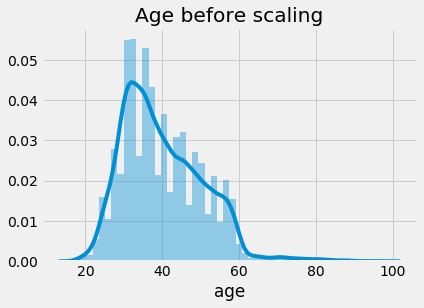

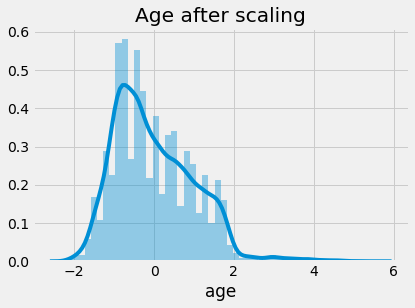

In [147]:
# age before scaleing
sns.distplot(model_data.age)
plt.title('Age before scaling')
plt.show()
# age after scaling
sns.distplot(scaled_df_train.age)
plt.title('Age after scaling')
plt.show()


We see that the data is distributed the same, but now we have a much different range of values

In [150]:
# put our scaled data in a dictionary for ease of working with it later
scaled_data = {'X_train': scaled_df_train, 'y_train':y_train, 
               'X_test': scaled_df_test, 'y_test':y_test}

### Class Imbalance - SMOTE

As we've seen above we have somewhat of a class imbalance issue. Only \~11% of our label data is a "yes" or "1".
This needs to be accounted for in order to keep the model from being accurate by simply predicting the right outcome 89% of the time, which is already the prevalence of 0's in the data. 

One way of addressing this issue is through oversampling our positive data. To do this, we will use the Synthetic Minority Oversampling Technique (SMOTE). SMOTE generates new sample data for the minority class (in this case a 1 for 'y_yes' by creating 'synthetic' samples that are combinations of the closest minority class observations.

In [152]:
from imblearn.over_sampling import SMOTE 

Using TensorFlow backend.


In [153]:
# Previous original class distribution
print('Original class distribution: \n')
print(target.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(scaled_df_train
                                                        , y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    36548
1     4640
Name: y_yes, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    27396
0    27396
dtype: int64


It looks like we've effectively oversampled our data. Let's make this into a dataframe again to help keep track or our feature labels.

In [159]:
# create a dataframe with the resamples X_train
X_train_df_resampled = pd.DataFrame(X_train_resampled, columns=scaled_df_train.columns)
X_train_df_resampled.head(2)

,age,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,p_contacted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_yes,loan_yes,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.474181,-0.556333,-0.35206,-0.224286,0.951837,0.846389,-0.19414,-0.584839,-0.539092,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,-0.325417,-0.149123,2.265303,-0.15978,-0.089228,-0.354981,0.807747,-0.628144,-0.354345,-0.252032,-0.439608,-0.551183,-0.075697,2.554450,-0.647129,0.513109,-0.512958,-0.009855,-1.074679,-0.45633,0.75677,-0.260567,2.388258,-0.067956,-0.458452,-0.38579,-0.116408,-0.70582,-0.33584,-0.135135,-0.120206,-0.488378,-0.505649,-0.516027,2.025066,-0.496041,-0.34331,0.400118,-0.183473
1,-0.674294,-0.556333,-0.35206,0.593321,-0.472041,0.846389,-0.19414,-0.584839,-0.539092,-0.190428,-0.161792,-0.275552,-0.208673,-0.186932,-0.325417,-0.149123,2.265303,-0.15978,-0.089228,-0.354981,-1.238011,1.591992,-0.354345,-0.252032,-0.439608,1.814279,-0.075697,-0.391474,-0.647129,0.513109,-0.512958,-0.009855,0.930510,-0.45633,0.75677,-0.260567,-0.418715,-0.067956,2.181255,-0.38579,-0.116408,-0.70582,-0.33584,-0.135135,-0.120206,-0.488378,-0.505649,1.937882,-0.493811,-0.496041,-0.34331,0.400118,-0.183473


In [160]:
# store our SMOTE data in a dictionary
SMOTE_data = {'X_train': X_train_df_resampled, 'y_train':y_train_resampled,
              'X_test': scaled_data_test, 'y_test':y_test}

### Transformation Conclusions

We've completed our data transformations for now and are ready to being modeling. We're moving forward with three versions of our data:
* original data
* scaled data
* SMOTE data

There is always more we can do to the data. But it is important to keep it and unadulterated as we can. If we do decide to do more we can always explore: 
* Dimensionality reduction with Principal Component Analysis (PCA)
* Adding the data we removed back in
* Removing features that appear to not have much importance

# Modeling

We're ready to start modeling! A very exciting phase of the project. We'll start o see what, if any, impact our transformations have had on model performance, and to try out a number of different models to see which performs best. 

As this is a project for learning purposes, we're going to try out a lot of models. In this section we will work through
* **Logistic Regression**
* **K-Nearest Neighbors**
* **Decision Trees and Random Forest**
* **XGBoost**
* **Support Vector Machines (SVM)**

We'll also apply a grid search method to each to see if we can work through a range of hyper-parameters to find a what performs best. In short, we'll be doing a lot! 

### Model Scoring Notes:
As we work though our models we'll be looking at a few common ML metrics to determine which model and data treatment is performing best. We will observe: 

**Train Accuracy vs. Test Accuracy:** We'll be primarily comparing these two metrics to check for overfitting - if there is a large gap bewtween the two (more than 10%) we'll consider the model potentially overfit

**Test Accuracy:** Accuracy is the total number of predictions the model gets right (True Positives + True Negatives) / Total observations
* Accuracy is good simple metric to judge the performance of a classification model, but it can be misleading in cases with a class imbalance. It is relatively easy to be highly accurate if most of the data is labeled one way.

**Precision:** Precision refers to how accurate the model is at predicting positive cases correctly - True Positive / (True Positive + False Positive)
* Precision is a good metric to use when the **costs of false positives are high**. Example: Evidence that suggests a person is guilty of a crime (like DNA matching). False positives in this example would have a severe cost to the person accused of the crime, precision is therefore very important. 

**Recall:** Recall refers to how many actual positives the model captures by labeling it correctly - True Positive / (True Positive + False Negative)
* Recall is a good metric to use when the **costs of false negatives are high**. Example: Detecting fraud or serious illnesses - either example can have a serious effect for an organization that fails to detect fraud early enough,or for a patient that needs care or could potentially be contagious

**F1 score:** F1 score is a balanced metric that combines precision and recall
* This metric is best used when seeking a balance between precision and recall and performs well with unbalanced data. It penalizes models that skew too heavily toward precision or recall, and therefore will only be high if both are high.

So, **which metric is best for our business problem?** 
* In our case we are trying to determine which customers are most likely to say "yes" and subscribe to our banking product 
* What is the cost of a False Positive (we predict a customer will subscribe but they will not)?
    * We unnecessarily target them for more marketing - costing time and resources
    * We potentially annoy them by contacting them too much and turn them off from future campaigns
* What is the cost of a False Negative (we predict a customer would not subscribe but they would)?
    * We do not target them with additional marketing when it may be productive
    * We potentially miss out on gaining this person as a customer
    
It seems our trade-off is between the cost of marketing to a customer that is unlikely to subscribe and the missed revenue of failing to gain a customer that would subscribe. Let's assume that marketing to one additional customer has a relatively low cost, and the lifetime value of having an additional customer is relatively high. In this case, I would **prioritze recall** when evaluating my model metrics. 

We will monitor accuracy for overall model performance as well, and look to F1 score as a secondary metric to try to maintain some balance in our model results.  

### Model Results Dataframe

In order to track the results of all of our models and easily compare them, we will create an empty dataframe with the metrics we will use to measure our model performance, and also a helper function that can run our models and add metrics iteratively.

In [232]:
model_results = pd.DataFrame(columns=['model','data','train_accuracy', 
                                      'test_accuracy', 'precision','recall', 
                                      'f1_score'])
model_results

,model,data,train_accuracy,test_accuracy,precision,recall,f1_score


In [166]:
# create a helper function that fits a model to training data
# captures performance metrics, and records them in our dataframe
def add_model_results(model, data, model_name, data_name, df=model_results):
    
    model.fit(data['X_train'], data['y_train'])
    train_preds = model.predict(data['X_train'])
    test_preds = model.predict(data['X_test'])
    p_score = precision_score(data['y_test'], test_preds)
    r_score = recall_score(data['y_test'], test_preds)
    train_accuracy = accuracy_score(data['y_train'], train_preds)
    test_accuracy = accuracy_score(data['y_test'], test_preds)
    f_score = f1_score(data['y_test'], test_preds)
    
    scores = [{'model': model_name, 'data': data_name, 
               'train_accuracy': round(train_accuracy, 3),
               'test_accuracy': round(test_accuracy, 3),
               'precision': round(p_score, 3),
               'recall':round(r_score, 3),
               'f1_score': round(f_score, 3)}]
    
    df = model_results.append(scores, ignore_index=True)
    
    return df

In [171]:
# put our diffent data treatments in a list for easy iteration
modeling_data1 = [original_data, scaled_data, SMOTE_data]
modeling_data1_names = ['original_data', 'scaled_data', 'SMOTE_data']

## Logistic Regression

The first model that we'll work with is Logistic Regression. This model is  well suited for binary classification, which we are seeking to do, and attempts to fit a curved line to our binary label data by estimating coefficients for each feature in our dataset. 

In [172]:
## Specify the classifier, in this case LogisticRegression()
logreg = LogisticRegression(random_state=175, solver='lbfgs', max_iter=1000)

In [233]:
# fit the logreg model to each set of data we have, show confusion matricies
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=logreg,
                                      data=d,
                                      model_name="LogisticRegression",
                                      data_name = modeling_data1_names[i])
    print('LogisticRegression: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], logreg.predict(d['X_test'])), '\n')
    
model_results

LogisticRegression: original_data
[[8985  167]
 [ 879  266]] 

LogisticRegression: scaled_data
[[9003  149]
 [ 871  274]] 

LogisticRegression: SMOTE_data
[[7644 1508]
 [ 430  715]] 



,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.899,0.898,0.614,0.232,0.337
1,LogisticRegression,scaled_data,0.901,0.901,0.648,0.239,0.349
2,LogisticRegression,SMOTE_data,0.740,0.812,0.322,0.624,0.425


#### Logistic Regression Observations:
* None of the models appeal to overfit - accuracy actually improves for test date with our SMOTE set
* Observing our confusion matrices we can see how the SMOTE model predicts a much larger number of positive cases overall, demonstrating the greater recall, but much lower precision
* Accuracy is much higher for our original and scaled sets, but **recall is low**. Given our class imbalance issue the accuracy in the original data is not too surprising
* Recall is and **F1** are much higher for the SMOTE data. Even with the lower accuracy, I would want to use this model at this point it was all we had to work with.  

### Logistic Regression Grid Search

As mentioned previously, while we are still learning which hyperparameters are best for a model and data like this, one method we can use to explore many of them is to conduct a grid search via Scikit-learn's **GridSearchCV**.

One thing that is cool about this method is that is builds in cross validation, which is one more tool for avoiding over-fitting our model. 

We will try to keep our number of hyperparameters low so that we don't have to spend too much tome computing, but since this is also a learning exercise we will give up a little efficiency and try out a few. 

LogReg hyperparameters we will variations for include: 
* C = inverse regularization strength - applies a penalty to increasing the magnitude of parameter values in order to reduce overfitting
* solver = algorithms used by the model
* class_weight = weights associated with classes

In [234]:
## Create a parameter grid to identify optimal parameters
logreg_param_grid = {'C':[.5,1,2],
                     'solver':['lbfgs', 'liblinear'],
                     'class_weight': ['balanced', None]}

We will run a grid search that:
* does three cross-validation folds
* prioritizes the recall metric

In [235]:
# establish the gridsearch model for logreg
logreg_gs = GridSearchCV(logreg, 
                         logreg_param_grid,
                         cv=3, 
                         scoring='recall',
                         n_jobs=-1)

In [236]:
# fit the logreg_gs model to each set of data we have, show confusion matricies
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=logreg_gs,
                                      data=d,
                                      model_name="GridSearch-logreg",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-logreg: ', modeling_data1_names[i])
    print('Best parameters: ',  logreg_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], logreg_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-logreg:  original_data
Best parameters:  {'C': 1, 'class_weight': 'balanced', 'solver': 'lbfgs'} 

[[7875 1277]
 [ 471  674]] 

GridSearch-logreg:  scaled_data
Best parameters:  {'C': 0.5, 'class_weight': 'balanced', 'solver': 'lbfgs'} 

[[7767 1385]
 [ 448  697]] 

GridSearch-logreg:  SMOTE_data
Best parameters:  {'C': 0.5, 'class_weight': 'balanced', 'solver': 'lbfgs'} 

[[7644 1508]
 [ 430  715]] 



,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.899,0.898,0.614,0.232,0.337
1,LogisticRegression,scaled_data,0.901,0.901,0.648,0.239,0.349
2,LogisticRegression,SMOTE_data,0.740,0.812,0.322,0.624,0.425
3,GridSearch-logreg,original_data,0.832,0.830,0.345,0.589,0.435
4,GridSearch-logreg,scaled_data,0.825,0.822,0.335,0.609,0.432
5,GridSearch-logreg,SMOTE_data,0.740,0.812,0.322,0.624,0.425


#### Logistic Regression Grid Search Observations
* When prioritizing recall accuracy scores remain lower
* Recall did significantly improve among our original and scaled data
* F1 is now the highest for the original data 

## K-Nearest Neighbors

K-Nearest Neighbors (KNN) attempts to classify our data by measuring the proximity of the K closest data points and making and estimation for the label data. With the high dimensionality of our dataset this will be a very computationally intensive model. Let's see what results we get. 

In [237]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [238]:
# fit the logreg model to each set of data we have, show confusion matricies
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=knn_clf,
                                      data=d,
                                      model_name="KNeighborsClassifier",
                                      data_name = modeling_data1_names[i])
    print('KNeighborsClassifier: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], knn_clf.predict(d['X_test'])), '\n')
    
model_results

KNeighborsClassifier: original_data
[[8808  344]
 [ 842  303]] 

KNeighborsClassifier: scaled_data
[[8882  270]
 [ 846  299]] 

KNeighborsClassifier: SMOTE_data
[[7211 1941]
 [ 513  632]] 



,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.899,0.898,0.614,0.232,0.337
1,LogisticRegression,scaled_data,0.901,0.901,0.648,0.239,0.349
2,LogisticRegression,SMOTE_data,0.740,0.812,0.322,0.624,0.425
3,GridSearch-logreg,original_data,0.832,0.830,0.345,0.589,0.435
4,GridSearch-logreg,scaled_data,0.825,0.822,0.335,0.609,0.432
5,GridSearch-logreg,SMOTE_data,0.740,0.812,0.322,0.624,0.425
6,KNeighborsClassifier,original_data,0.913,0.885,0.468,0.265,0.338
7,KNeighborsClassifier,scaled_data,0.912,0.892,0.525,0.261,0.349
8,KNeighborsClassifier,SMOTE_data,0.920,0.762,0.246,0.552,0.340


#### KNN Observations:
* Our first run of KNN appears to have behaved similarly to the LogReg model in that it has higher accuracy scores, but low precision for the original and scaled data
* The SMOTE model appears to potentially be overfit, as there is a fairly large gap between the train and test accuracy. 
* Given the computational expense and low performance on for this model we probably would not suggest it for this application

Due to the low performance and computational expense we'll just try Grid Search on one set of data. The scaled data performed the best, so we will try that.  

### KNN Grid Search

The KNN hyperparameters we will try are:
* n_neighbors: the number of neighbors the model uses to estimate a label
* weights: weight function used in prediction
* p: power parameter - equivalent of using manhattan distance, euclidean distance

In [239]:
## Create a parameter grid to identify optimal parameters
knn_param_grid = {'n_neighbors':[3,5,7],
                     'weights':['uniform', 'distance'],
                     'p': [1, 2, 3]}

In [241]:
knn_clf_gs = GridSearchCV(knn_clf,
                          knn_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

In [242]:
model_results = add_model_results(model=knn_clf_gs, 
                                  data=scaled_data, 
                                  model_name='GridSearch-KNN',
                                  data_name='scaled_data')

print('KNN Best Parameters: ', knn_clf_gs.best_params_)

print(confusion_matrix(scaled_data['y_test'], 
                       knn_clf_gs.predict(scaled_data['X_test'])))


model_results

KNN Best Parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
[[8625  527]
 [ 801  344]]


,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.899,0.898,0.614,0.232,0.337
1,LogisticRegression,scaled_data,0.901,0.901,0.648,0.239,0.349
2,LogisticRegression,SMOTE_data,0.740,0.812,0.322,0.624,0.425
3,GridSearch-logreg,original_data,0.832,0.830,0.345,0.589,0.435
4,GridSearch-logreg,scaled_data,0.825,0.822,0.335,0.609,0.432
5,GridSearch-logreg,SMOTE_data,0.740,0.812,0.322,0.624,0.425
6,KNeighborsClassifier,original_data,0.913,0.885,0.468,0.265,0.338
7,KNeighborsClassifier,scaled_data,0.912,0.892,0.525,0.261,0.349
8,KNeighborsClassifier,SMOTE_data,0.920,0.762,0.246,0.552,0.340
9,GridSearch-KNN,scaled_data,0.994,0.871,0.395,0.300,0.341


In [96]:
print(confusion_matrix(y_test, knn_clf_gs.predict(X_test)))

[[8934  218]
 [ 873  272]]


In [97]:
knn_clf_gs.best_params_

{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

In [98]:
model_results = add_model_results(model=knn_clf_gs, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-KNN',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [99]:
print(confusion_matrix(y_test, knn_clf_gs.predict(scaled_data_test)))

[[8122 1030]
 [ 694  451]]


In [100]:
knn_clf_gs.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

https://github.com/rab175/dsc-knn-with-scikit-learn-lab-online-ds-pt-071519/tree/solution

## Decision Tree & Random Forest

regular tree as baseline
https://github.com/rab175/dsc-tree-ensembles-random-forests-lab-online-ds-pt-071519/tree/solution

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 

In [103]:
model_results = add_model_results(model=tree_clf, 
                                  data=original_data, 
                                  model_name='DecisionTreeClassifier',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


feature importance

In [104]:
print(confusion_matrix(y_test, tree_clf.predict(X_test)))

[[8948  204]
 [ 841  304]]


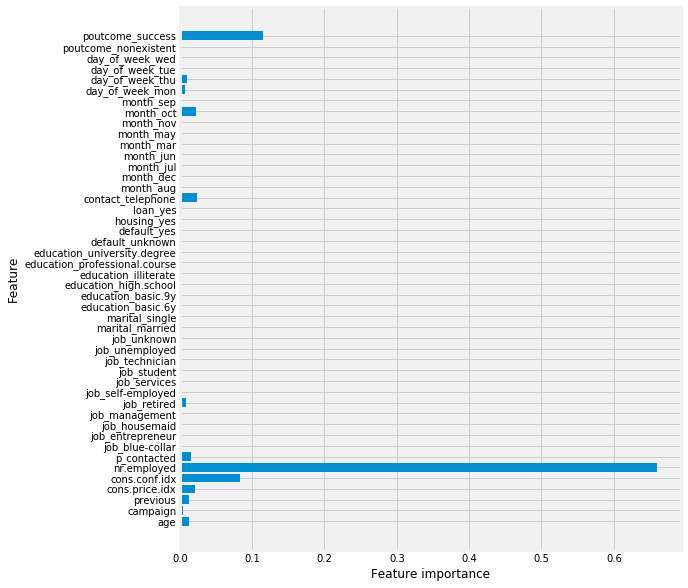

In [105]:
def plot_feature_importances(model):
    n_features = scaled_data_train.shape[1]
    plt.figure(figsize=(8,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), scaled_df_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [106]:
model_results = add_model_results(model=tree_clf, 
                                  data=scaled_data, 
                                  model_name='DecisionTreeClassifier',
                                  data_name='scaled_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [107]:
print(confusion_matrix(y_test, tree_clf.predict(scaled_data_test)))

[[8948  204]
 [ 841  304]]


In [108]:
model_results = add_model_results(model=tree_clf, 
                                  data=SMOTE_data, 
                                  model_name='DecisionTreeClassifier',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [109]:
print(confusion_matrix(y_test, tree_clf.predict(scaled_data_test)))

[[8144 1008]
 [ 508  637]]


In [110]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

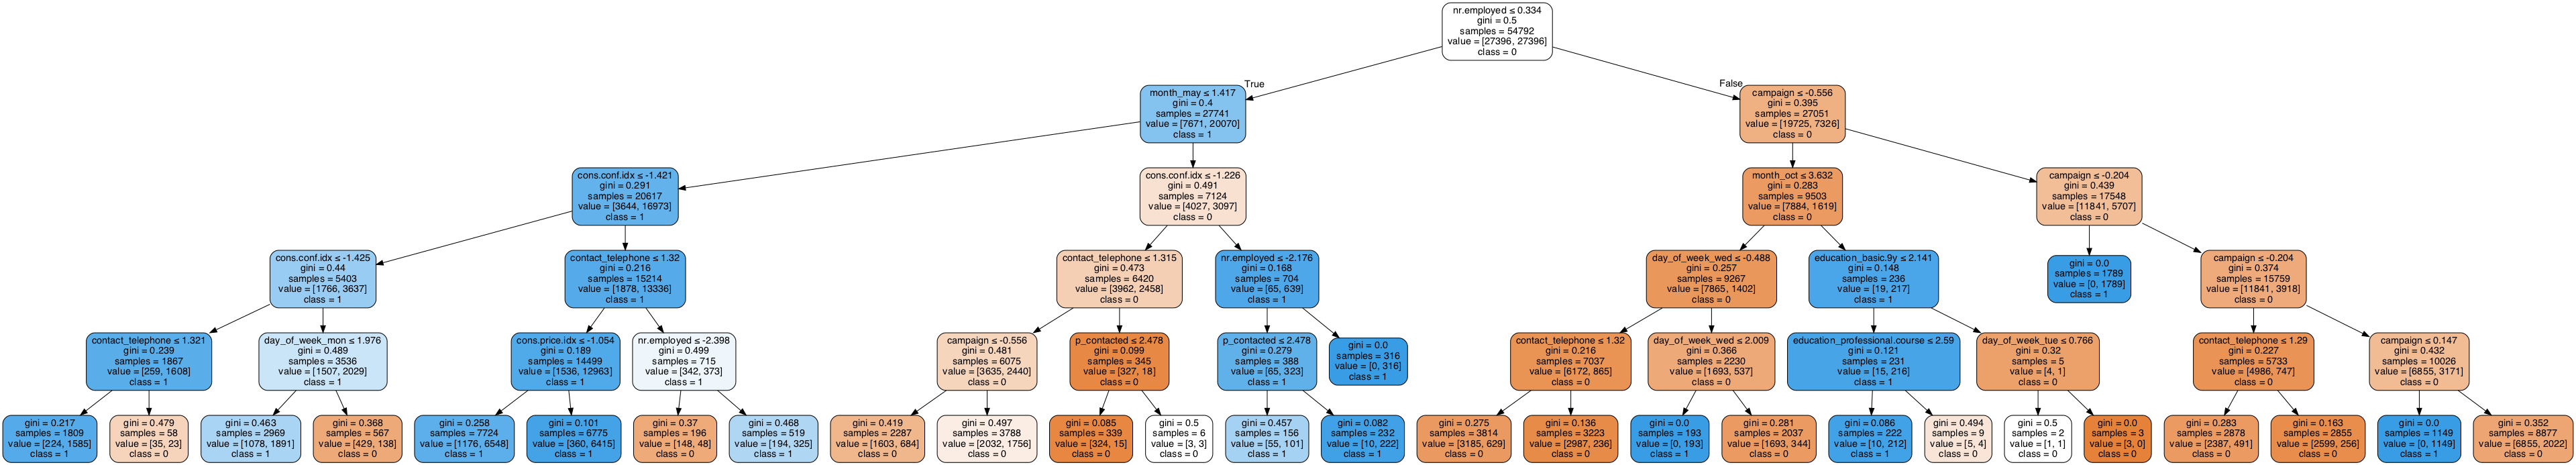

In [111]:
# Create DOT data
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=scaled_df_train.columns,  
                           class_names=np.unique(target).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

graph.set_size('"40,20!"')

# Show graph
Image(graph.create_png())

In [112]:
## Create a parameter grid to identify optimal parameters
tree_param_grid = {'criterion':['gini', 'entropy'],
                   'max_depth':[3,4,5,None],
                   'min_samples_split': [2,5, 10, 15]}

In [113]:
tree_clf_gs = GridSearchCV(tree_clf,
                          tree_param_grid,
                          scoring='accuracy', 
                          cv=3,
                          n_jobs=-1)

In [114]:
model_results = add_model_results(model=tree_clf_gs, 
                                  data=original_data, 
                                  model_name='GridSearch-Tree',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [115]:
print(confusion_matrix(y_test, tree_clf_gs.predict(X_test)))

[[8965  187]
 [ 855  290]]


In [116]:
tree_clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [117]:
model_results = add_model_results(model=tree_clf_gs, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-Tree',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [118]:
print(confusion_matrix(y_test, tree_clf_gs.predict(scaled_data_test)))

[[8456  696]
 [ 784  361]]


In [119]:
tree_clf_gs.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}

### Random Forest

https://github.com/rab175/dsc-tree-ensembles-random-forests-lab-online-ds-pt-071519/tree/solution

In [120]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

In [121]:
model_results = add_model_results(model=forest, 
                                  data=original_data, 
                                  model_name='RandomForestClassifier',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [122]:
print(confusion_matrix(y_test, forest.predict(X_test)))

[[9055   97]
 [ 938  207]]


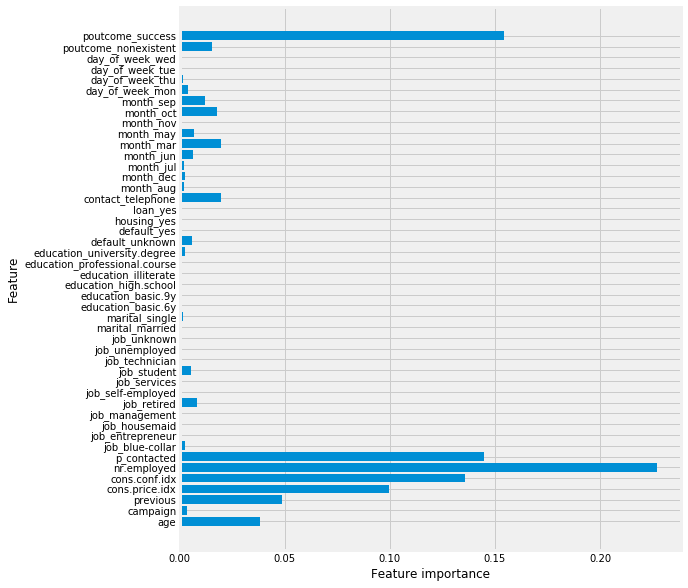

In [123]:
plot_feature_importances(forest)

In [124]:
model_results = add_model_results(model=tree_clf_gs, 
                                  data=scaled_data, 
                                  model_name='RandomForestClassifier',
                                  data_name='scaled_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [125]:
print(confusion_matrix(y_test, forest.predict(scaled_data_test)))

[[9012  140]
 [ 913  232]]


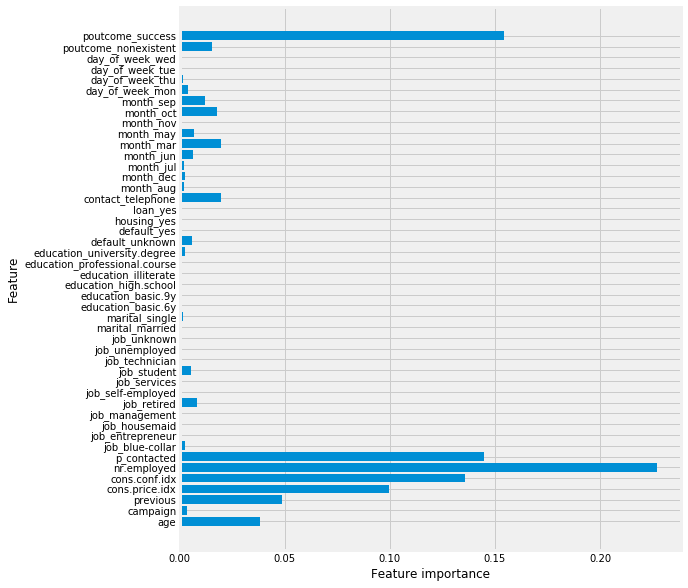

In [126]:
plot_feature_importances(forest)

In [127]:
model_results = add_model_results(model=forest, 
                                  data=SMOTE_data, 
                                  model_name='RandomForestClassifier',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [128]:
print(confusion_matrix(y_test, forest.predict(scaled_data_test)))

[[8019 1133]
 [ 484  661]]


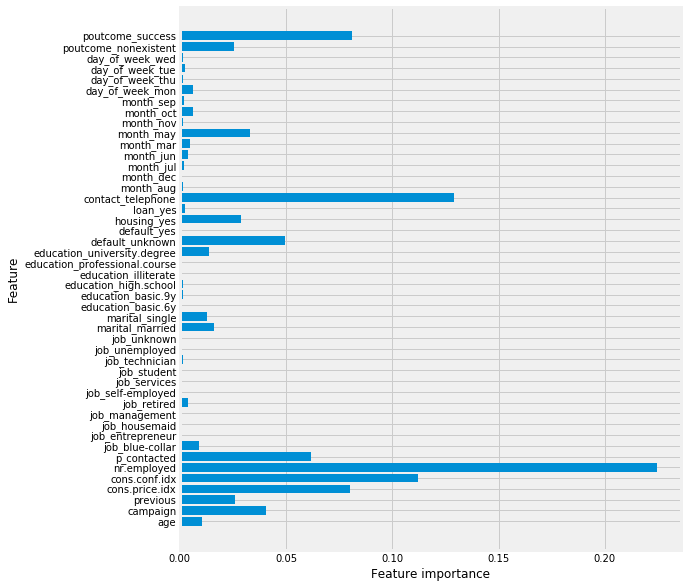

In [129]:
plot_feature_importances(forest)

Grid search and cross validation

https://github.com/rab175/dsc-gridsearchcv-lab-online-ds-pt-071519/tree/solution

In [130]:
forest_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]}

In [131]:
n = 1
for k in forest_param_grid:
    n *= len(forest_param_grid[k]) 
n

96

Grid Search will have to search through 96 different permutations.

In [132]:
# Instantiate GridSearchCV
forest_gs = GridSearchCV(forest, 
                         forest_param_grid,
                         cv=3, 
                         return_train_score=True,
                         n_jobs=-1)

In [133]:
model_results = add_model_results(model=forest_gs, 
                                  data=original_data, 
                                  model_name='GridSearch-Forest',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [134]:
print(confusion_matrix(y_test, forest_gs.predict(X_test)))

[[8977  175]
 [ 861  284]]


In [135]:
forest_gs.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 30}

In [136]:
model_results = add_model_results(model=forest_gs, 
                                  data=scaled_data, 
                                  model_name='GridSearch-Forest',
                                  data_name='scaled_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [137]:
print(confusion_matrix(y_test, forest_gs.predict(scaled_data_test)))

[[8968  184]
 [ 858  287]]


In [138]:
forest_gs.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [139]:
model_results = add_model_results(model=forest_gs, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-Forest',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [140]:
print(confusion_matrix(y_test, forest_gs.predict(scaled_data_test)))

[[8671  481]
 [ 679  466]]


In [141]:
forest_gs.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

## XGBoost

https://github.com/rab175/dsc-xgboost-lab-online-ds-pt-071519/tree/solution

In [142]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [143]:
# Instantiate XGBClassifier
xgb_clf = XGBClassifier()

In [144]:
model_results = add_model_results(model=xgb_clf, 
                                  data=original_data, 
                                  model_name='XGBClassifier',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [145]:
print(confusion_matrix(y_test, xgb_clf.predict(X_test)))

[[8986  166]
 [ 871  274]]


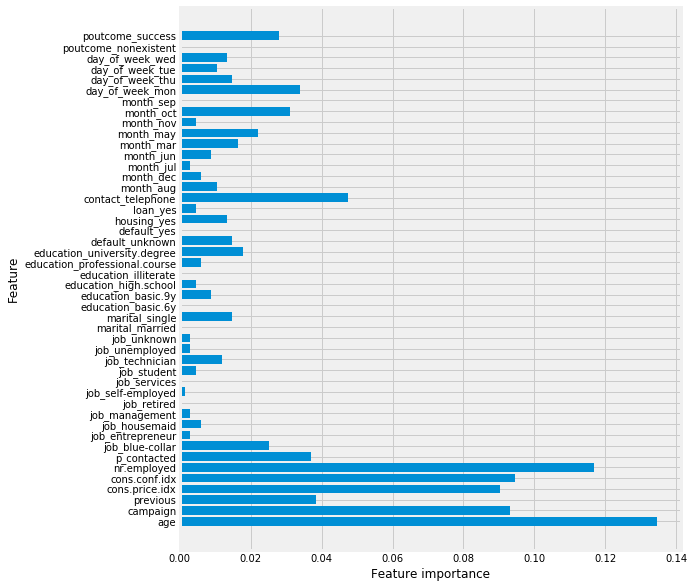

In [146]:
plot_feature_importances(xgb_clf)

In [147]:
model_results = add_model_results(model=xgb_clf, 
                                  data=scaled_data, 
                                  model_name='XGBClassifier',
                                  data_name='scaled_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [148]:
print(confusion_matrix(y_test, xgb_clf.predict(scaled_data_test)))

[[8986  166]
 [ 871  274]]


In [149]:
model_results = add_model_results(model=xgb_clf, 
                                  data=SMOTE_data, 
                                  model_name='XGBClassifier',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [150]:
print(confusion_matrix(y_test, xgb_clf.predict(scaled_data_test)))

[[8647  505]
 [ 673  472]]


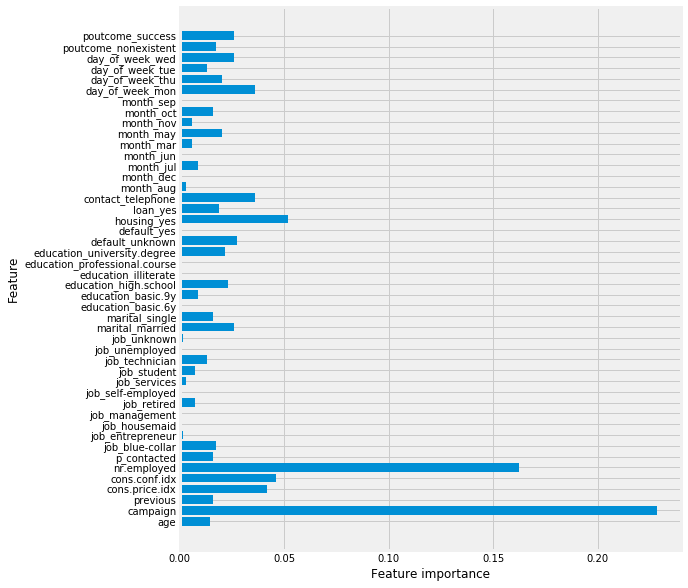

In [151]:
plot_feature_importances(xgb_clf)

In [157]:
xgb_param_grid = {
    'learning_rate': [.01, 0.1, 0.2],
    'max_depth': [3,6],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.5, 0.7, 1],
    'n_estimators': [100, 150]}

In [158]:
n=1 
for k in xgb_param_grid:
    n *= len(xgb_param_grid[k])
n

108

In [154]:
xgb_gs_clf = GridSearchCV(xgb_clf, 
                          xgb_param_grid,
                          scoring='accuracy',
                          cv=3,
                          n_jobs=-1)

In [156]:
model_results.tail()

,model,data,accuracy_score,precision,recall,f1_score
0,GridSearch-Forest,scaled_data,0.899,0.609,0.251,0.355
0,GridSearch-Forest,SMOTE_data,0.887,0.492,0.407,0.446
0,XGBClassifier,original_data,0.899,0.623,0.239,0.346
0,XGBClassifier,scaled_data,0.899,0.623,0.239,0.346
0,XGBClassifier,SMOTE_data,0.886,0.483,0.412,0.445


In [159]:
model_results = add_model_results(model=xgb_gs_clf, 
                                  data=original_data, 
                                  model_name='GridSearch-XGB',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [160]:
print(confusion_matrix(y_test, xgb_gs_clf.predict(X_test)))

[[8978  174]
 [ 864  281]]


In [161]:
xgb_gs_clf.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.5}

In [162]:
model_results = add_model_results(model=xgb_gs_clf, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-XGB',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [163]:
print(confusion_matrix(y_test, xgb_gs_clf.predict(scaled_data_test)))

[[8910  242]
 [ 831  314]]


In [164]:
xgb_gs_clf.best_params_

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 1}

## Support Vector Machine

In [165]:
svm_clf = SVC(gamma='auto', random_state=175)

In [166]:
model_results = add_model_results(model=svm_clf, 
                                  data=original_data, 
                                  model_name='SVM',
                                  data_name='original_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [167]:
print(confusion_matrix(y_test, svm_clf.predict(X_test)))

[[8992  160]
 [ 907  238]]


In [168]:
model_results = add_model_results(model=svm_clf, 
                                  data=SMOTE_data, 
                                  model_name='SVM',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [169]:
## Specify the parameter grid to be used during the GridSearchCV
svm_param_grid = {'C':[1,5,10],
                'class_weight':['balanced', None]}

In [170]:
svm_gs_clf = GridSearchCV(svm_clf, 
                          svm_param_grid,
                          scoring='accuracy',
                          cv=3,
                          n_jobs=-1)

In [171]:
model_results = add_model_results(model=svm_gs_clf, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-SVM',
                                  data_name='SMOTE_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [172]:
print(confusion_matrix(y_test, svm_gs_clf.predict(scaled_data_test)))

[[8602  550]
 [ 739  406]]


In [173]:
svm_gs_clf.best_params_

{'C': 10, 'class_weight': 'balanced'}

## Principle Component Analysis

In [174]:
## Apply PCA to the original-scaled (unbalanced) dataset

## Create counter variables to identify the optimal number of components to use
## in order to explain at least 99% of the variance

components = 0
explained_variance = 0

## Use a while loop to incrementally add a component, and calculate the explained variance for
## this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(scaled_data_train)
    explained_variance = sum(pca.explained_variance_ratio_)
    

## Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the original (unbalanced) dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the original (unbalanced) dataset" )

Use  42  for PCA Dimension Reduction in the original (unbalanced) dataset
This explains  99.32 % of the variance in the original (unbalanced) dataset


In [175]:
## Apply the transformation to the test data for the original (unbalanced) dataset 
X_test_pca = pca.transform(scaled_data_test)

In [176]:
pca_data = {'X_train': X_train_pca, 'y_train':y_train,
              'X_test': X_test_pca, 'y_test':y_test}

In [177]:
## Apply PCA to the SMOTE dataset

## Create counter variables to identify the optimal number of components to use
## in order to explain at least 99% of the variance

components = 0
explained_variance = 0

## Use a while loop to incrementally add a component, and calculate the explained variance for
## this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_SMOTE_pca = pca.fit_transform(X_train_resampled)
    explained_variance = sum(pca.explained_variance_ratio_)
    

## Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the SMOTE dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the SMOTE dataset" )

Use  42  for PCA Dimension Reduction in the SMOTE dataset
This explains  99.25 % of the variance in the SMOTE dataset


In [178]:
## Apply the SMOTE transformation to the test data for the scaled dataset 
X_test_SMOTE_pca = pca.transform(scaled_data_test)

In [179]:
SMOTE_pca_data = {'X_train': X_train_SMOTE_pca, 'y_train':y_train_resampled,
                  'X_test': X_test_SMOTE_pca, 'y_test':y_test}

In [180]:
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [181]:
sorted_model_results = model_results.copy()

In [182]:
accuracy_model_results = sorted_model_results.sort_values(by='accuracy_score',
                                                          ascending=False)
accuracy_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,DecisionTreeClassifier,scaled_data,0.899,0.598,0.266,0.368
0,GridSearch-Forest,original_data,0.899,0.619,0.248,0.354
0,XGBClassifier,original_data,0.899,0.623,0.239,0.346


In [183]:
f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.853,0.387,0.556,0.457
0,RandomForestClassifier,SMOTE_data,0.843,0.368,0.577,0.450
0,GridSearch-Forest,SMOTE_data,0.887,0.492,0.407,0.446
0,XGBClassifier,SMOTE_data,0.886,0.483,0.412,0.445
0,SVM,SMOTE_data,0.862,0.401,0.493,0.442


In [184]:
models = [tree_clf, forest, xgb_clf, svm_clf]
model_names = ['DecisionTreeClassifier', 'RandomForestClassifier',
               'XGBClassifier', 'SVM']

In [185]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=pca_data,
                                      model_name=model_names[i], 
                                      data_name='pca_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [186]:
for i,m in enumerate(models):
    print(model_names[i], '\n', 
          confusion_matrix(pca_data['y_test'],  
                    m.predict(pca_data['X_test'])), '\n')

DecisionTreeClassifier 
 [[8914  238]
 [ 847  298]] 

RandomForestClassifier 
 [[9076   76]
 [ 957  188]] 

XGBClassifier 
 [[8995  157]
 [ 878  267]] 

SVM 
 [[8974  178]
 [ 879  266]] 



In [187]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=SMOTE_pca_data,
                                      model_name=model_names[i], 
                                      data_name='SMOTE_pca_data')
model_results

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearchCV-LogReg,original,0.897,0.602,0.226,0.329
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,KNeighborsClassifier,original_data,0.886,0.480,0.258,0.335
0,KNeighborsClassifier,scaled_data,0.891,0.519,0.268,0.354
0,KNeighborsClassifier,SMOTE_data,0.757,0.237,0.533,0.328
0,GridSearch-KNN,original_data,0.894,0.555,0.238,0.333
0,GridSearch-KNN,SMOTE_data,0.833,0.305,0.394,0.343


In [188]:
for i,m in enumerate(models):
    print(model_names[i], '\n', 
          confusion_matrix(SMOTE_pca_data['y_test'],  
                    m.predict(SMOTE_pca_data['X_test'])), '\n')

DecisionTreeClassifier 
 [[7565 1587]
 [ 448  697]] 

RandomForestClassifier 
 [[7740 1412]
 [ 433  712]] 

XGBClassifier 
 [[7945 1207]
 [ 465  680]] 

SVM 
 [[8212  940]
 [ 572  573]] 



In [189]:
sorted_model_results = model_results.copy()
f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.853,0.387,0.556,0.457
0,RandomForestClassifier,SMOTE_data,0.843,0.368,0.577,0.450
0,XGBClassifier,SMOTE_pca_data,0.838,0.360,0.594,0.449
0,GridSearch-Forest,SMOTE_data,0.887,0.492,0.407,0.446
0,XGBClassifier,SMOTE_data,0.886,0.483,0.412,0.445


In [190]:
accuracy_model_results = sorted_model_results.sort_values(by='accuracy_score',
                                                          ascending=False)
accuracy_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,RandomForestClassifier,pca_data,0.900,0.712,0.164,0.267
0,GridSearch-Tree,original_data,0.899,0.608,0.253,0.358
0,XGBClassifier,pca_data,0.899,0.630,0.233,0.340


## Adding Data Back In

In [191]:
full_data = pd.get_dummies(data, drop_first=True)
full_data.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,p_contacted,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [192]:
full_data.shape

(41188, 49)

In [193]:
target = full_data.y_yes
variables = full_data.drop(columns=['y_yes'])

In [194]:
X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

In [195]:
final_data = {'X_train': X_train, 'y_train':y_train,
              'X_test': X_test, 'y_test':y_test}

In [196]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=final_data,
                                      model_name=model_names[i], 
                                      data_name='final_data')
model_results.tail()

,model,data,accuracy_score,precision,recall,f1_score
0,SVM,SMOTE_pca_data,0.853,0.379,0.500,0.431
0,DecisionTreeClassifier,final_data,0.899,0.606,0.255,0.359
0,RandomForestClassifier,final_data,0.900,0.690,0.177,0.282
0,XGBClassifier,final_data,0.900,0.635,0.246,0.355
0,SVM,final_data,0.897,0.601,0.210,0.312


In [197]:
for i,m in enumerate(models):
    print(model_names[i], '\n', 
          confusion_matrix(final_data['y_test'],  
                    m.predict(final_data['X_test'])), '\n')

DecisionTreeClassifier 
 [[8962  190]
 [ 853  292]] 

RandomForestClassifier 
 [[9061   91]
 [ 942  203]] 

XGBClassifier 
 [[8990  162]
 [ 863  282]] 

SVM 
 [[8992  160]
 [ 904  241]] 



In [198]:
def plot_feature_importances(model, data=X_train):
    n_features = data.shape[1]
    plt.figure(figsize=(8,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

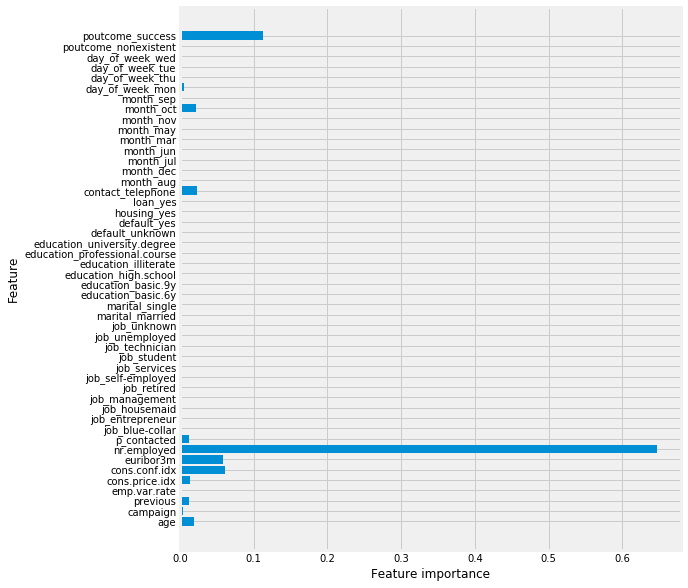

In [199]:
plot_feature_importances(tree_clf)

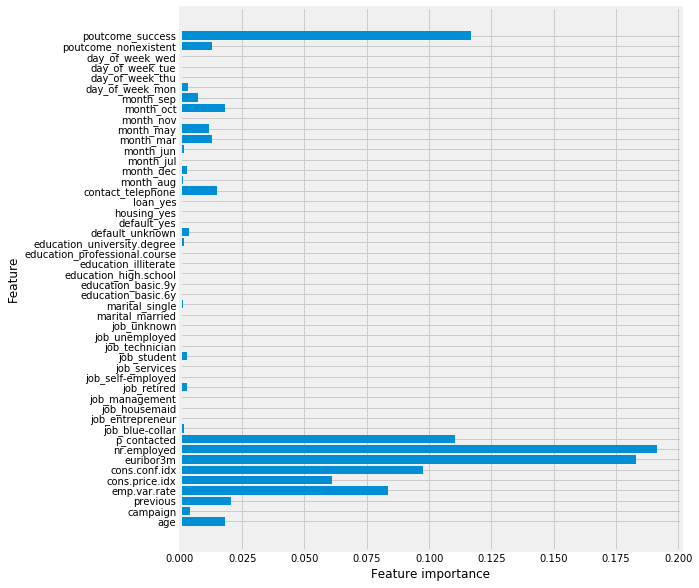

In [200]:
plot_feature_importances(forest)

In [201]:
sorted_model_results = model_results.copy()
accuracy_model_results = sorted_model_results.sort_values(by='accuracy_score',
                                                          ascending=False)
accuracy_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,XGBClassifier,final_data,0.900,0.635,0.246,0.355
0,RandomForestClassifier,final_data,0.900,0.690,0.177,0.282
0,RandomForestClassifier,pca_data,0.900,0.712,0.164,0.267


In [202]:
f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.853,0.387,0.556,0.457
0,RandomForestClassifier,SMOTE_data,0.843,0.368,0.577,0.450
0,XGBClassifier,SMOTE_pca_data,0.838,0.360,0.594,0.449
0,GridSearch-Forest,SMOTE_data,0.887,0.492,0.407,0.446
0,XGBClassifier,SMOTE_data,0.886,0.483,0.412,0.445


In [203]:
combined_model_results = sorted_model_results.sort_values(by=['accuracy_score', 
                                                              'f1_score'],
                                                          ascending=False)
combined_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,XGBClassifier,final_data,0.900,0.635,0.246,0.355
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,RandomForestClassifier,final_data,0.900,0.690,0.177,0.282
0,RandomForestClassifier,pca_data,0.900,0.712,0.164,0.267


In [204]:
combined_model_results = sorted_model_results.sort_values(by=[f'f1_score',
                                                          'accuracy_score'],
                                                          ascending=False)
combined_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.853,0.387,0.556,0.457
0,RandomForestClassifier,SMOTE_data,0.843,0.368,0.577,0.450
0,XGBClassifier,SMOTE_pca_data,0.838,0.360,0.594,0.449
0,GridSearch-Forest,SMOTE_data,0.887,0.492,0.407,0.446
0,XGBClassifier,SMOTE_data,0.886,0.483,0.412,0.445


### Final Data SMOTE and Scale

In [205]:
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

In [206]:
X_train_resampled = pd.DataFrame(data=X_train_resampled, 
                                 columns=X_train.columns.values)
X_train_resampled.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,p_contacted,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,45.0,1.0,0.0,1.4,93.444,-36.1,4.966,5228.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,33.0,1.0,0.0,1.4,93.918,-42.7,4.962,5228.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,36.0,1.0,0.0,-0.1,93.200,-42.0,4.120,5195.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,42.0,1.0,1.0,-1.8,93.075,-47.1,1.405,5099.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33.0,5.0,0.0,1.4,93.444,-36.1,4.962,5228.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [207]:
scaled_data_train = scaler.fit_transform(X_train_resampled)
scaled_data_test = scaler.transform(X_test)

In [208]:
final_SMOTE_data = {'X_train': scaled_data_train, 'y_train':y_train_resampled,
                    'X_test': scaled_data_test, 'y_test':y_test}

In [209]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=final_SMOTE_data,
                                      model_name=model_names[i], 
                                      data_name='final_SMOTE_data')
model_results.tail(10)

,model,data,accuracy_score,precision,recall,f1_score
0,XGBClassifier,SMOTE_pca_data,0.838,0.360,0.594,0.449
0,SVM,SMOTE_pca_data,0.853,0.379,0.500,0.431
0,DecisionTreeClassifier,final_data,0.899,0.606,0.255,0.359
0,RandomForestClassifier,final_data,0.900,0.690,0.177,0.282
0,XGBClassifier,final_data,0.900,0.635,0.246,0.355
0,SVM,final_data,0.897,0.601,0.210,0.312
0,DecisionTreeClassifier,final_SMOTE_data,0.878,0.451,0.435,0.443
0,RandomForestClassifier,final_SMOTE_data,0.839,0.363,0.591,0.450
0,XGBClassifier,final_SMOTE_data,0.890,0.510,0.366,0.426
0,SVM,final_SMOTE_data,0.885,0.482,0.404,0.440


In [210]:
for i,m in enumerate(models):
    print(model_names[i], '\n', 
          confusion_matrix(final_SMOTE_data['y_test'],  
                    m.predict(final_SMOTE_data['X_test'])), '\n')

DecisionTreeClassifier 
 [[8546  606]
 [ 647  498]] 

RandomForestClassifier 
 [[7966 1186]
 [ 468  677]] 

XGBClassifier 
 [[8750  402]
 [ 726  419]] 

SVM 
 [[8654  498]
 [ 682  463]] 



In [211]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by='f1_score',
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.853,0.387,0.556,0.457
0,RandomForestClassifier,final_SMOTE_data,0.839,0.363,0.591,0.450
0,RandomForestClassifier,SMOTE_data,0.843,0.368,0.577,0.450
0,XGBClassifier,SMOTE_pca_data,0.838,0.360,0.594,0.449
0,GridSearch-Forest,SMOTE_data,0.887,0.492,0.407,0.446


### PCA - Again

In [212]:
## Apply PCA to the final_SMOTE dataset

## Create counter variables to identify the optimal number of components to use
## in order to explain at least 99% of the variance

components = 0
explained_variance = 0

## Use a while loop to incrementally add a component, and calculate the explained variance for
## this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(scaled_data_train)
    explained_variance = sum(pca.explained_variance_ratio_)
    

## Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the full  dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the original full dataset" )

Use  42  for PCA Dimension Reduction in the full  dataset
This explains  99.31 % of the variance in the original full dataset


In [213]:
## Apply the transformation to the test data for the full dataset 
X_test_pca = pca.transform(scaled_data_test)

In [214]:
final_pca_data = {'X_train': X_train_pca, 'y_train':y_train_resampled,
                  'X_test': X_test_pca, 'y_test':y_test}

In [215]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=final_pca_data,
                                      model_name=model_names[i], 
                                      data_name='final_pca_data')
model_results.tail(10)

,model,data,accuracy_score,precision,recall,f1_score
0,XGBClassifier,final_data,0.900,0.635,0.246,0.355
0,SVM,final_data,0.897,0.601,0.210,0.312
0,DecisionTreeClassifier,final_SMOTE_data,0.878,0.451,0.435,0.443
0,RandomForestClassifier,final_SMOTE_data,0.839,0.363,0.591,0.450
0,XGBClassifier,final_SMOTE_data,0.890,0.510,0.366,0.426
0,SVM,final_SMOTE_data,0.885,0.482,0.404,0.440
0,DecisionTreeClassifier,final_pca_data,0.833,0.350,0.583,0.438
0,RandomForestClassifier,final_pca_data,0.821,0.333,0.608,0.430
0,XGBClassifier,final_pca_data,0.844,0.371,0.577,0.452
0,SVM,final_pca_data,0.882,0.466,0.416,0.439


In [216]:
for i,m in enumerate(models):
    print(model_names[i], '\n', 
          confusion_matrix(final_pca_data['y_test'],  
                    m.predict(final_pca_data['X_test'])), '\n')

DecisionTreeClassifier 
 [[7912 1240]
 [ 477  668]] 

RandomForestClassifier 
 [[7759 1393]
 [ 449  696]] 

XGBClassifier 
 [[8030 1122]
 [ 484  661]] 

SVM 
 [[8606  546]
 [ 669  476]] 



In [217]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by=['f1_score', 
                                                        'accuracy_score'],
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,DecisionTreeClassifier,SMOTE_data,0.853,0.387,0.556,0.457
0,XGBClassifier,final_pca_data,0.844,0.371,0.577,0.452
0,RandomForestClassifier,SMOTE_data,0.843,0.368,0.577,0.450
0,RandomForestClassifier,final_SMOTE_data,0.839,0.363,0.591,0.450
0,XGBClassifier,SMOTE_pca_data,0.838,0.360,0.594,0.449


# Taking Data Back Out 

In [218]:
full_data.columns.values

array(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'p_contacted',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success', 'y_yes'], dtype=object)

In [219]:
jobs = ['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown']
last_data = full_data.drop(columns=jobs).copy()
last_data.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,p_contacted,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [220]:
education = ['education_basic.6y', 'education_basic.9y',
             'education_high.school', 'education_illiterate',
             'education_professional.course', 'education_university.degree']

last_data = last_data.drop(columns=education).copy()
last_data.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,p_contacted,marital_married,marital_single,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [221]:
last_data.shape

(41188, 32)

In [222]:
target = last_data.y_yes
variables = last_data.drop(columns=['y_yes'])

In [223]:
X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

In [224]:
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

In [225]:
X_train_resampled = pd.DataFrame(data=X_train_resampled, 
                                 columns= variables.columns.values)

In [226]:
drop_cats_data = {'X_train': X_train_resampled, 'y_train':y_train_resampled,
                  'X_test': X_test, 'y_test':y_test}

In [227]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=drop_cats_data,
                                      model_name=model_names[i], 
                                      data_name='drop_cats_data')
model_results.tail(10)

,model,data,accuracy_score,precision,recall,f1_score
0,XGBClassifier,final_SMOTE_data,0.890,0.510,0.366,0.426
0,SVM,final_SMOTE_data,0.885,0.482,0.404,0.440
0,DecisionTreeClassifier,final_pca_data,0.833,0.350,0.583,0.438
0,RandomForestClassifier,final_pca_data,0.821,0.333,0.608,0.430
0,XGBClassifier,final_pca_data,0.844,0.371,0.577,0.452
0,SVM,final_pca_data,0.882,0.466,0.416,0.439
0,DecisionTreeClassifier,drop_cats_data,0.876,0.446,0.469,0.457
0,RandomForestClassifier,drop_cats_data,0.847,0.378,0.584,0.459
0,XGBClassifier,drop_cats_data,0.891,0.516,0.368,0.429
0,SVM,drop_cats_data,0.835,0.356,0.598,0.446


In [228]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by=['f1_score', 
                                                        'accuracy_score'],
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,RandomForestClassifier,drop_cats_data,0.847,0.378,0.584,0.459
0,DecisionTreeClassifier,drop_cats_data,0.876,0.446,0.469,0.457
0,DecisionTreeClassifier,SMOTE_data,0.853,0.387,0.556,0.457
0,XGBClassifier,final_pca_data,0.844,0.371,0.577,0.452
0,RandomForestClassifier,SMOTE_data,0.843,0.368,0.577,0.450


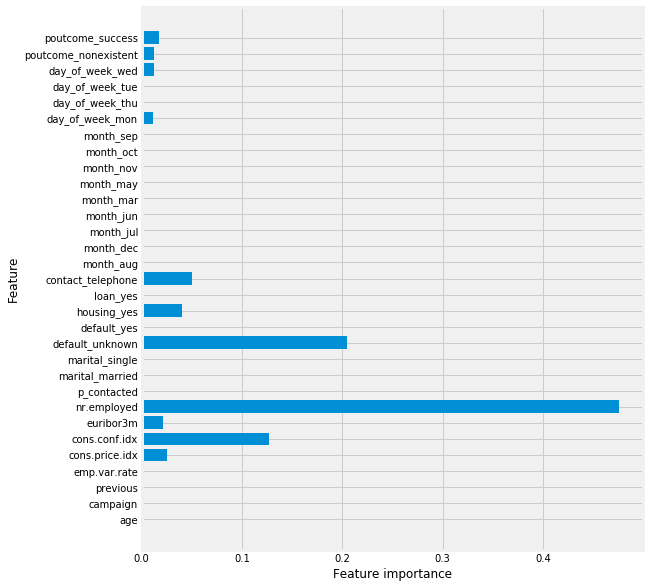

In [229]:
plot_feature_importances(tree_clf, data=X_train_resampled)

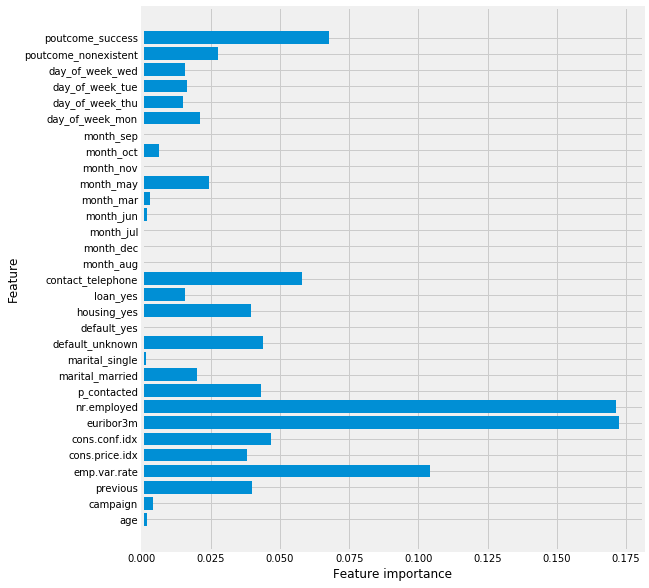

In [230]:
plot_feature_importances(forest,data=X_train_resampled)

In [231]:
months = ['month_aug', 'month_dec', 'month_jul', 'month_jun','month_nov', 
          'month_sep',]

last_data = last_data.drop(columns=months).copy()

target = last_data.y_yes
variables = last_data.drop(columns=['y_yes'])

X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

X_train_resampled = pd.DataFrame(data=X_train_resampled, 
                                 columns= variables.columns.values)

drop_cats_data2 = {'X_train': X_train_resampled, 'y_train':y_train_resampled,
                  'X_test': X_test, 'y_test':y_test}

In [232]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=drop_cats_data2,
                                      model_name=model_names[i], 
                                      data_name='drop_cats_data2')
model_results.tail(10)

,model,data,accuracy_score,precision,recall,f1_score
0,XGBClassifier,final_pca_data,0.844,0.371,0.577,0.452
0,SVM,final_pca_data,0.882,0.466,0.416,0.439
0,DecisionTreeClassifier,drop_cats_data,0.876,0.446,0.469,0.457
0,RandomForestClassifier,drop_cats_data,0.847,0.378,0.584,0.459
0,XGBClassifier,drop_cats_data,0.891,0.516,0.368,0.429
0,SVM,drop_cats_data,0.835,0.356,0.598,0.446
0,DecisionTreeClassifier,drop_cats_data2,0.876,0.445,0.461,0.453
0,RandomForestClassifier,drop_cats_data2,0.848,0.381,0.582,0.460
0,XGBClassifier,drop_cats_data2,0.891,0.511,0.375,0.432
0,SVM,drop_cats_data2,0.830,0.344,0.587,0.434


In [233]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by=['f1_score', 
                                                        'accuracy_score'],
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,RandomForestClassifier,drop_cats_data2,0.848,0.381,0.582,0.460
0,RandomForestClassifier,drop_cats_data,0.847,0.378,0.584,0.459
0,DecisionTreeClassifier,drop_cats_data,0.876,0.446,0.469,0.457
0,DecisionTreeClassifier,SMOTE_data,0.853,0.387,0.556,0.457
0,DecisionTreeClassifier,drop_cats_data2,0.876,0.445,0.461,0.453


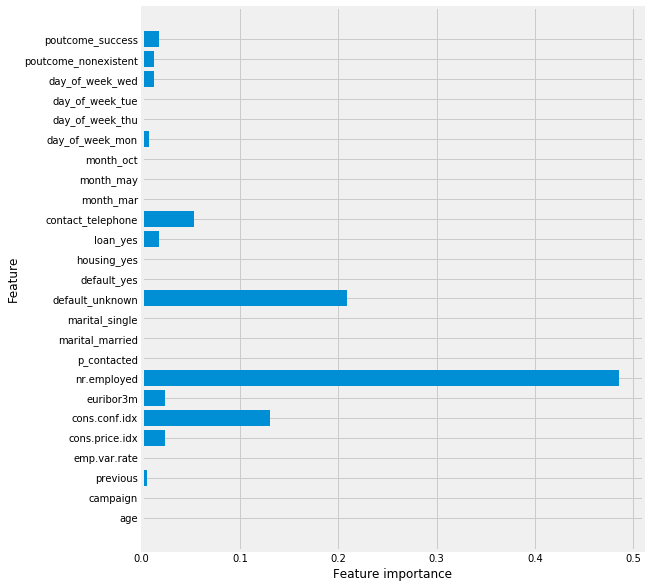

In [234]:
plot_feature_importances(tree_clf, data=X_train_resampled)

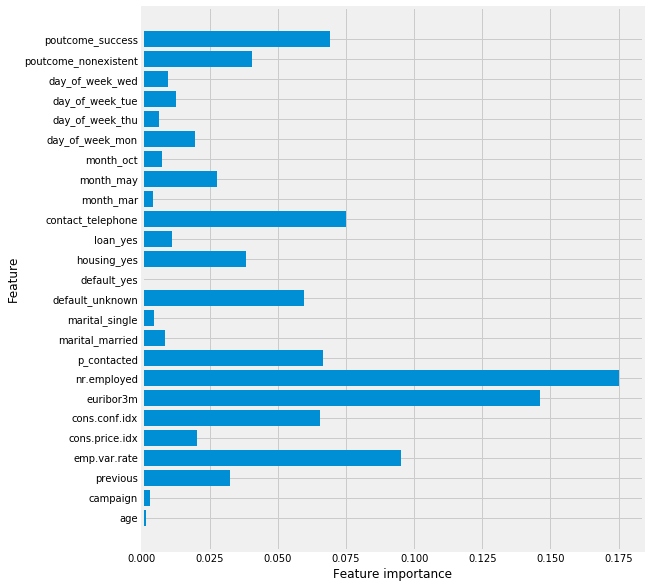

In [235]:
plot_feature_importances(forest,data=X_train_resampled)

In [236]:
scaled_data_train = scaler.fit_transform(X_train_resampled)
scaled_data_test = scaler.transform(X_test)

## Apply PCA to the final_SMOTE dataset

## Create counter variables to identify the optimal number of components to use
## in order to explain at least 99% of the variance

components = 0
explained_variance = 0

## Use a while loop to incrementally add a component, and calculate the explained variance for
## this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.99:
    components+=1
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(scaled_data_train)
    explained_variance = sum(pca.explained_variance_ratio_)
    

## Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the full  dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the original full dataset" )



Use  21  for PCA Dimension Reduction in the full  dataset
This explains  99.31 % of the variance in the original full dataset


In [237]:
## Apply the transformation to the test data for the full dataset 
X_test_pca = pca.transform(scaled_data_test)

In [238]:
cat_drop_pca_data = {'X_train': X_train_pca, 'y_train':y_train_resampled,
                    'X_test': X_test_pca, 'y_test':y_test}

In [239]:
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=cat_drop_pca_data,
                                      model_name=model_names[i], 
                                      data_name='cat_drop_pca_data')
model_results.tail(10)

,model,data,accuracy_score,precision,recall,f1_score
0,XGBClassifier,drop_cats_data,0.891,0.516,0.368,0.429
0,SVM,drop_cats_data,0.835,0.356,0.598,0.446
0,DecisionTreeClassifier,drop_cats_data2,0.876,0.445,0.461,0.453
0,RandomForestClassifier,drop_cats_data2,0.848,0.381,0.582,0.460
0,XGBClassifier,drop_cats_data2,0.891,0.511,0.375,0.432
0,SVM,drop_cats_data2,0.830,0.344,0.587,0.434
0,DecisionTreeClassifier,cat_drop_pca_data,0.821,0.328,0.577,0.418
0,RandomForestClassifier,cat_drop_pca_data,0.829,0.344,0.594,0.436
0,XGBClassifier,cat_drop_pca_data,0.853,0.389,0.566,0.461
0,SVM,cat_drop_pca_data,0.880,0.458,0.449,0.453


In [240]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by=['f1_score', 
                                                        'accuracy_score'],
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,XGBClassifier,cat_drop_pca_data,0.853,0.389,0.566,0.461
0,RandomForestClassifier,drop_cats_data2,0.848,0.381,0.582,0.460
0,RandomForestClassifier,drop_cats_data,0.847,0.378,0.584,0.459
0,DecisionTreeClassifier,drop_cats_data,0.876,0.446,0.469,0.457
0,DecisionTreeClassifier,SMOTE_data,0.853,0.387,0.556,0.457


In [241]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by=['accuracy_score', 
                                                        'recall'],
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,scaled_data,0.901,0.647,0.237,0.347
0,XGBClassifier,final_data,0.900,0.635,0.246,0.355
0,LogisticRegression,original,0.900,0.623,0.245,0.352
0,RandomForestClassifier,final_data,0.900,0.690,0.177,0.282
0,RandomForestClassifier,pca_data,0.900,0.712,0.164,0.267


In [242]:
sorted_model_results = model_results.copy()

f1_model_results = sorted_model_results.sort_values(by=['recall',
                                                        'accuracy_score'],
                                                    ascending=False)
f1_model_results.head()

,model,data,accuracy_score,precision,recall,f1_score
0,LogisticRegression,SMOTE_data,0.813,0.323,0.623,0.426
0,GridSearch-LogReg,SMOTE_data,0.813,0.323,0.623,0.426
0,RandomForestClassifier,SMOTE_pca_data,0.821,0.335,0.622,0.436
0,DecisionTreeClassifier,SMOTE_pca_data,0.802,0.305,0.609,0.407
0,RandomForestClassifier,final_pca_data,0.821,0.333,0.608,0.430


In [263]:
def train_test_compare(model, data):

    train_score = accuracy_score(data['y_train'], 
                                     model.predict(data['X_train']))
    test_score = accuracy_score(data['y_test'], 
                                    model.predict(data['X_test'])) 
    
    print(f'Train score: {train_score}')
    print(f'Test score: {test_score}')

In [264]:
train_test_compare(model=xgb_clf, data= cat_drop_pca_data)

Train score: 0.8227843480800117
Test score: 0.852966883558318


In [268]:
for i,m in enumerate(models):
    
    print(model_names[i], '\n')
    
    train_test_compare(m, data=cat_drop_pca_data)
    
     
    print(confusion_matrix(cat_drop_pca_data['y_test'],  
                    m.predict(cat_drop_pca_data['X_test'])), '\n')
    

DecisionTreeClassifier 

Train score: 0.7744196233026719
Test score: 0.8212100611828688
[[7795 1357]
 [ 484  661]] 

RandomForestClassifier 

Train score: 0.7700394218134035
Test score: 0.8289793143634068
[[7856 1296]
 [ 465  680]] 

XGBClassifier 

Train score: 0.8227843480800117
Test score: 0.852966883558318
[[8135 1017]
 [ 497  648]] 

SVM 

Train score: 0.8894729157541247
Test score: 0.8796736913664174
[[8544  608]
 [ 631  514]] 



# Conclusions

# Graveyard

* try dropping parameters
* Try under-sampling noes 
* try SMOTE

In [ ]:
# def print_metrics(labels, preds):
#     print("Precision Score: {}".format(precision_score(labels, preds)))
#     print("Recall Score: {}".format(recall_score(labels, preds)))
#     print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
#     print("F1 Score: {}".format(f1_score(labels, preds)))

In [ ]:
# cont_vars = []
# cat_vars = []

# for col in df.columns: 
#     if df[col].dtype == 'O':
#         cat_vars.append(col)
#     else: 
#         cont_vars.append(col)

# print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
# print('----' * 8)
# print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

In [ ]:
# cat_vars.pop()
# cat_vars

In [ ]:
# for v in cat_vars:
#     print(v+':', '\n', df[v].value_counts(normalize=True), '\n')

In [ ]:
# camps = df.campaign.value_counts(normalize=True)
# camps_index = np.array(camps.index)

# cum_camps = []
# i = 0
# for v in camps: 
#     i += v
#     cum_camps.append(i)

# cum_camps = np.array(cum_camps) 


In [ ]:
# fig = plt.figure(figsize=(6,6))

# plt.plot(camps2, cum_camps)
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 10))
# plot = sns.catplot(x='job', kind='count', data=cat_data)

# # plot.ax gives the axis object
# # plot.ax.patches gives list of bars that can be access using index starting at 0

# for i, bar in enumerate(plot.ax.patches):
#     h = bar.get_height()
#     plot.ax.text(
#         i, # bar index (x coordinate of text)
#         h+10, # y coordinate of text
#         '{}'.format(int(h)),  # y label
#         ha='center', 
#         va='center', 
#         fontweight='bold', 
#         size=14)
# plt.show()

In [ ]:
# for col in cat_data.columns:
#     plt.figure(figsize=(6, 6))
#     fig = sns.countplot(y= cat_data[col], 
#                   data= cat_data,
#                   hue='y')
#     plt.xticks(fontsize=10, rotation=45)
#     plt.legend(fontsize=12, loc='best')
#     plt.title(col)
    
#     plt.show()

In [ ]:
# g = sns.catplot(x="poutcome", y="y", col="month",
#                 col_wrap = 5,
#                 data=test_data, saturation=.5,
#                 kind="bar", ci=None, aspect=.6)

# (g.set_axis_labels("", "Rate")
#   .set_xticklabels(["nonexistant", "failure", "success"])
#   .set_titles("{col_name} {col_var}")
#   .set(ylim=(0, 1))
#   .despine(left=True)
#   .legend(lob='best'))  

In [ ]:
# # create a function that plots the counts of uniques values for our dataframe
# def plot_cat_counts(df, hue=None):
    
#     fig = plt.figure(figsize=(15,30))
#     plt.subplots_adjust(hspace=1.3)

#     nrows = len(df.columns) //2 +1 
#     ncols = 2
    
#     for i,t in enumerate(list(df.columns)):
#         ax = fig.add_subplot(nrows, ncols, i+1)
#         sns.countplot(x= df[t], 
#                       data=df,  
#                       orient='v',
#                       ax=ax,
#                       hue=hue,
#                       palette = 'PuBuGn_d')
#         plt.title(t + '_count')
        
#         if df[t].nunique() > 3:
#             plt.xticks(rotation=45)

In [ ]:
# def add_model_results(model, data, model_name, data_name, df=model_results):
    
#     model.fit(data['X_train'], data['y_train'])
#     preds = model.predict(data['X_test'])
#     p_score = precision_score(data['y_test'], preds)
#     r_score = recall_score(data['y_test'], preds)
#     accuracy = accuracy_score(data['y_test'], preds)
#     f_score = f1_score(data['y_test'], preds)
    
#     scores = [{'model': model_name, 'data': data_name, 
#                'accuracy_score': round(accuracy, 3), 
#                'precision': round(p_score, 3),
#                'recall':round(r_score, 3),
#                'f1_score': round(f_score, 3)}]
    
#     df = model_results.append(scores, ignore_index=True)
    
#     return df